In [19]:

#  STEP 1: Load Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils import resample


In [20]:
#   Upload Dataset
file_path = "/content/CSHS.xlsx"
df = pd.read_excel(file_path)


In [21]:
#  Clean column names
df.columns = df.columns.str.strip()

In [22]:
#   Remove rows having >=4 zeros
input_cols = [
    "Course overview", "Reading file", "Abstract materiale", "Concrete material",
    "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
    "playing", "paused", "unstarted", "buffering"
]

def should_delete(row):
    zero_count = (row[input_cols] == 0).sum()
    return zero_count >= 4

df_cleaned = df[~df.apply(should_delete, axis=1)].reset_index(drop=True)


In [23]:
#   Split labelled and unlabelled
labelled_data = df_cleaned[df_cleaned["Processing"].notnull()].copy()
unlabelled_data = df_cleaned[df_cleaned["Processing"].isnull()].copy()

X_labelled = labelled_data[input_cols]
y_labelled = labelled_data[["Processing", "Perception", "Input", "Understanding"]]
#   Encode targets
encoders = {}
y_encoded = pd.DataFrame()

for col in y_labelled.columns:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y_labelled[col])
    encoders[col] = le
    #   Scale input
scaler = StandardScaler()
X_labelled_scaled = scaler.fit_transform(X_labelled)
#  Balance dataset (upsample minority classes)
df_balanced = pd.DataFrame(X_labelled_scaled, columns=input_cols)
df_balanced['Processing'] = y_encoded["Processing"]

max_size = df_balanced['Processing'].value_counts().max()

lst = [df_balanced]
for class_index, group in df_balanced.groupby('Processing'):
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))

df_balanced = pd.concat(lst).reset_index(drop=True)

X_balanced = df_balanced[input_cols]
y_balanced = df_balanced['Processing']
#   Split Balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
#   Define 10 Models
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

results = {}
#   Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }
#  STEP 12: Show results
results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  F1 Score      Confusion Matrix
RandomForest             0.5  0.496305  [[38, 27], [37, 26]]
XGBoost              0.53125  0.530562  [[37, 28], [32, 31]]
AdaBoost             0.53125  0.522844  [[43, 22], [38, 25]]
Bagging             0.546875  0.544649  [[40, 25], [33, 30]]
ExtraTrees            0.5625    0.5625  [[37, 28], [28, 35]]
LogisticRegression  0.460938  0.459782  [[33, 32], [37, 26]]
NaiveBayes          0.515625  0.471273  [[52, 13], [49, 14]]
SVM                 0.523438  0.502889  [[47, 18], [43, 20]]
KNN                 0.664062  0.663343  [[46, 19], [24, 39]]
DecisionTree        0.476562  0.476594  [[31, 34], [33, 30]]


In [24]:
#   Split labelled and unlabelled
labelled_data = df_cleaned[df_cleaned["Perception"].notnull()].copy()
unlabelled_data = df_cleaned[df_cleaned["Perception"].isnull()].copy()

X_labelled = labelled_data[input_cols]
y_labelled = labelled_data[["Processing", "Perception", "Input", "Understanding"]]
#   Encode targets
encoders = {}
y_encoded = pd.DataFrame()

for col in y_labelled.columns:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y_labelled[col])
    encoders[col] = le
    #   Scale input
scaler = StandardScaler()
X_labelled_scaled = scaler.fit_transform(X_labelled)
#  Balance dataset (upsample minority classes)
df_balanced = pd.DataFrame(X_labelled_scaled, columns=input_cols)
df_balanced['Perception'] = y_encoded["Perception"]

max_size = df_balanced['Perception'].value_counts().max()

lst = [df_balanced]
for class_index, group in df_balanced.groupby('Perception'):
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))

df_balanced = pd.concat(lst).reset_index(drop=True)

X_balanced = df_balanced[input_cols]
y_balanced = df_balanced['Perception']
#   Split Balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
#   Define 10 Models
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

results = {}
#   Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }
#  STEP 12: Show results
results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  F1 Score      Confusion Matrix
RandomForest        0.961165  0.961198   [[96, 1], [7, 102]]
XGBoost             0.883495  0.883055   [[95, 2], [22, 87]]
AdaBoost            0.601942  0.602242  [[58, 39], [43, 66]]
Bagging              0.88835  0.887851   [[96, 1], [22, 87]]
ExtraTrees          0.995146  0.995144   [[96, 1], [0, 109]]
LogisticRegression  0.524272  0.524631  [[52, 45], [53, 56]]
NaiveBayes          0.587379  0.534415  [[23, 74], [11, 98]]
SVM                 0.703883   0.70042  [[81, 16], [45, 64]]
KNN                 0.791262  0.787252   [[93, 4], [39, 70]]
DecisionTree         0.88835  0.887851   [[96, 1], [22, 87]]


In [25]:

#   Split labelled and unlabelled
labelled_data = df_cleaned[df_cleaned["Input"].notnull()].copy()
unlabelled_data = df_cleaned[df_cleaned["Input"].isnull()].copy()

X_labelled = labelled_data[input_cols]
y_labelled = labelled_data[["Processing", "Perception", "Input", "Understanding"]]
#   Encode targets
encoders = {}
y_encoded = pd.DataFrame()

for col in y_labelled.columns:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y_labelled[col])
    encoders[col] = le
    #   Scale input
scaler = StandardScaler()
X_labelled_scaled = scaler.fit_transform(X_labelled)
#  Balance dataset (upsample minority classes)
df_balanced = pd.DataFrame(X_labelled_scaled, columns=input_cols)
df_balanced['Input'] = y_encoded["Input"]

max_size = df_balanced['Input'].value_counts().max()

lst = [df_balanced]
for class_index, group in df_balanced.groupby('Input'):
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))

df_balanced = pd.concat(lst).reset_index(drop=True)

X_balanced = df_balanced[input_cols]
y_balanced = df_balanced['Input']
#   Split Balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
#   Define 10 Models
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

results = {}
#   Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }
#  STEP 12: Show results
results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  F1 Score      Confusion Matrix
RandomForest        0.897849   0.89745   [[79, 17], [2, 88]]
XGBoost             0.801075  0.801035  [[74, 22], [15, 75]]
AdaBoost            0.548387  0.543727  [[62, 34], [50, 40]]
Bagging             0.887097  0.886655   [[78, 18], [3, 87]]
ExtraTrees          0.978495  0.978495    [[94, 2], [2, 88]]
LogisticRegression   0.55914   0.55914  [[55, 41], [41, 49]]
NaiveBayes          0.505376  0.445178  [[79, 17], [75, 15]]
SVM                 0.639785  0.637186  [[69, 27], [40, 50]]
KNN                  0.61828  0.611943  [[47, 49], [22, 68]]
DecisionTree        0.860215  0.858453   [[71, 25], [1, 89]]


In [26]:

#   Split labelled and unlabelled
labelled_data = df_cleaned[df_cleaned["Understanding"].notnull()].copy()
unlabelled_data = df_cleaned[df_cleaned["Understanding"].isnull()].copy()

X_labelled = labelled_data[input_cols]
y_labelled = labelled_data[["Processing", "Perception", "Input", "Understanding"]]
#   Encode targets
encoders = {}
y_encoded = pd.DataFrame()

for col in y_labelled.columns:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y_labelled[col])
    encoders[col] = le
    #   Scale input
scaler = StandardScaler()
X_labelled_scaled = scaler.fit_transform(X_labelled)
#  Balance dataset (upsample minority classes)
df_balanced = pd.DataFrame(X_labelled_scaled, columns=input_cols)
df_balanced['Understanding'] = y_encoded["Understanding"]

max_size = df_balanced['Understanding'].value_counts().max()

lst = [df_balanced]
for class_index, group in df_balanced.groupby('Understanding'):
    lst.append(group.sample(max_size - len(group), replace=True, random_state=42))

df_balanced = pd.concat(lst).reset_index(drop=True)

X_balanced = df_balanced[input_cols]
y_balanced = df_balanced['Understanding']
#   Split Balanced Data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
#   Define 10 Models
models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

results = {}
#   Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }
#  STEP 12: Show results
results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  F1 Score      Confusion Matrix
RandomForest        0.760736  0.760244  [[71, 18], [21, 53]]
XGBoost             0.674847  0.674178  [[64, 25], [28, 46]]
AdaBoost            0.595092  0.592741  [[45, 44], [22, 52]]
Bagging             0.754601  0.752237  [[74, 15], [25, 49]]
ExtraTrees          0.809816  0.810203  [[69, 20], [11, 63]]
LogisticRegression  0.509202  0.507353  [[39, 50], [30, 44]]
NaiveBayes          0.447853  0.413528  [[20, 69], [21, 53]]
SVM                 0.570552  0.549253  [[32, 57], [13, 61]]
KNN                 0.680982  0.679443  [[66, 23], [29, 45]]
DecisionTree        0.779141  0.776372  [[77, 12], [24, 50]]


In [27]:
#   Label Unlabeled Data using Semi-supervised learning
from sklearn.semi_supervised import SelfTrainingClassifier

#  Prepare Unlabeled data inputs
X_unlabelled = unlabelled_data[input_cols]
X_unlabelled_scaled = scaler.transform(X_unlabelled)

#  Combine labelled + unlabelled
X_combined = np.vstack((X_labelled_scaled, X_unlabelled_scaled))

# Prepare y_combined
y_combined = np.concatenate((y_encoded["Processing"], [-1]*len(X_unlabelled_scaled)))

#  Use best model → RandomForest as base
base_model = RandomForestClassifier()

#  Create Self Training Model
self_training_model = SelfTrainingClassifier(base_model)
self_training_model.fit(X_combined, y_combined)

#  Predict pseudo-labels for unlabelled
pseudo_labels = self_training_model.predict(X_unlabelled_scaled)

#  Decode labels to original (reverse transform)
pseudo_labels_decoded = encoders["Processing"].inverse_transform(pseudo_labels)

#  Add predicted labels to unlabelled_data
unlabelled_data["Predicted Processing"] = pseudo_labels_decoded

#  Show final labelled unlabelled data
print(unlabelled_data[["id", "Predicted Processing"]].head(20))


           id Predicted Processing
610  0108E196                  REF
611  0124Y179                  REF
612  2120Y890                  ACT
613  0137Q847                  ACT
614  0133E024                  REF
615  2130U049                  ACT
616  2130W464                  REF
617  2130V610                  REF
618  2130U811                  ACT
619  0145E424                  ACT
620  0146T511                  ACT
621  0145Z518                  ACT
622  0144W650                  ACT
623  0103C618                  REF
624  0119I973                  ACT
625  0146H849                  REF
626  0147Z304                  REF
627  0147H705                  ACT
628  0147F999                  ACT
629  R.SaCidi                  REF


In [28]:
unlabelled_data.to_csv("Unlabelled_with_Predicted_LabelsProcessing.csv", index=False)
print("Saved as CSV.")


Saved as CSV.


In [29]:
#  Label Unlabeled Data using Semi-supervised learning
from sklearn.semi_supervised import SelfTrainingClassifier

#  Prepare Unlabeled data inputs
X_unlabelled = unlabelled_data[input_cols]
X_unlabelled_scaled = scaler.transform(X_unlabelled)

#  Combine labelled + unlabelled
X_combined = np.vstack((X_labelled_scaled, X_unlabelled_scaled))

# Prepare y_combined
y_combined = np.concatenate((y_encoded["Perception"], [-1]*len(X_unlabelled_scaled)))

#  Use best model → RandomForest as base
base_model = RandomForestClassifier()

#  Create Self Training Model
self_training_model = SelfTrainingClassifier(base_model)
self_training_model.fit(X_combined, y_combined)

#  Predict pseudo-labels for unlabelled
pseudo_labels = self_training_model.predict(X_unlabelled_scaled)

#  Decode labels to original (reverse transform)
pseudo_labels_decoded = encoders["Perception"].inverse_transform(pseudo_labels)

#  Add predicted labels to unlabelled_data
unlabelled_data["Predicted Perception"] = pseudo_labels_decoded

#  Show final labelled unlabelled data
print(unlabelled_data[["id", "Predicted Perception"]].head(20))
unlabelled_data.to_csv("Unlabelled_with_Predicted_LabelsPerception.csv", index=False)
print("Saved as CSV.")



           id Predicted Perception
610  0108E196                  SEN
611  0124Y179                  SEN
612  2120Y890                  SEN
613  0137Q847                  SEN
614  0133E024                  SEN
615  2130U049                  SEN
616  2130W464                  SEN
617  2130V610                  SEN
618  2130U811                  SEN
619  0145E424                  SEN
620  0146T511                  SEN
621  0145Z518                  SEN
622  0144W650                  SEN
623  0103C618                  SEN
624  0119I973                  SEN
625  0146H849                  SEN
626  0147Z304                  SEN
627  0147H705                  SEN
628  0147F999                  SEN
629  R.SaCidi                  SEN
Saved as CSV.


In [30]:
#   Label Unlabeled Data using Semi-supervised learning
from sklearn.semi_supervised import SelfTrainingClassifier

#  Prepare Unlabeled data inputs
X_unlabelled = unlabelled_data[input_cols]
X_unlabelled_scaled = scaler.transform(X_unlabelled)

#  Combine labelled + unlabelled
X_combined = np.vstack((X_labelled_scaled, X_unlabelled_scaled))

# Prepare y_combined
y_combined = np.concatenate((y_encoded["Input"], [-1]*len(X_unlabelled_scaled)))

#  Use best model → RandomForest as base
base_model = RandomForestClassifier()

#  Create Self Training Model
self_training_model = SelfTrainingClassifier(base_model)
self_training_model.fit(X_combined, y_combined)

#  Predict pseudo-labels for unlabelled
pseudo_labels = self_training_model.predict(X_unlabelled_scaled)

#  Decode labels to original (reverse transform)
pseudo_labels_decoded = encoders["Input"].inverse_transform(pseudo_labels)

#  Add predicted labels to unlabelled_data
unlabelled_data["Predicted Input"] = pseudo_labels_decoded

#  Show final labelled unlabelled data
print(unlabelled_data[["id", "Predicted Input"]].head(20))
unlabelled_data.to_csv("Unlabelled_with_Predicted_LabelsInput.csv", index=False)
print("Saved as CSV.")


           id Predicted Input
610  0108E196             VIS
611  0124Y179             VIS
612  2120Y890             VIS
613  0137Q847             VIS
614  0133E024             VIS
615  2130U049             VIS
616  2130W464             VIS
617  2130V610             VIS
618  2130U811             VIS
619  0145E424             VIS
620  0146T511             VIS
621  0145Z518             VIS
622  0144W650             VIS
623  0103C618             VIS
624  0119I973             VIS
625  0146H849             VIS
626  0147Z304             VIS
627  0147H705             VIS
628  0147F999             VIS
629  R.SaCidi             VIS
Saved as CSV.


In [31]:
#  Label Unlabeled Data using Semi-supervised learning
from sklearn.semi_supervised import SelfTrainingClassifier

# Prepare Unlabeled data inputs
X_unlabelled = unlabelled_data[input_cols]
X_unlabelled_scaled = scaler.transform(X_unlabelled)

#  Combine labelled + unlabelled
X_combined = np.vstack((X_labelled_scaled, X_unlabelled_scaled))

# Prepare y_combined
y_combined = np.concatenate((y_encoded["Understanding"], [-1]*len(X_unlabelled_scaled)))

#  Use best model → RandomForest as base
base_model = RandomForestClassifier()

# Create Self Training Model
self_training_model = SelfTrainingClassifier(base_model)
self_training_model.fit(X_combined, y_combined)

#  Predict pseudo-labels for unlabelled
pseudo_labels = self_training_model.predict(X_unlabelled_scaled)

#  Decode labels to original (reverse transform)
pseudo_labels_decoded = encoders["Understanding"].inverse_transform(pseudo_labels)

#  Add predicted labels to unlabelled_data
unlabelled_data["Predicted Understanding"] = pseudo_labels_decoded

#  Show final labelled unlabelled data
print(unlabelled_data[["id", "Predicted Understanding"]].head(20))
unlabelled_data.to_csv("Unlabelled_with_Predicted_LabelsUnderstanding.csv", index=False)
print("Saved as CSV.")

           id Predicted Understanding
610  0108E196                     SEQ
611  0124Y179                     SEQ
612  2120Y890                     GLO
613  0137Q847                     SEQ
614  0133E024                     SEQ
615  2130U049                     SEQ
616  2130W464                     GLO
617  2130V610                     GLO
618  2130U811                     SEQ
619  0145E424                     SEQ
620  0146T511                     SEQ
621  0145Z518                     SEQ
622  0144W650                     SEQ
623  0103C618                     SEQ
624  0119I973                     SEQ
625  0146H849                     GLO
626  0147Z304                     SEQ
627  0147H705                     SEQ
628  0147F999                     SEQ
629  R.SaCidi                     SEQ
Saved as CSV.


In [32]:
# INSTALL LIBRARY (uncomment if needed)
# !pip install imbalanced-learn

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# DEFINE FILES AND TARGET COLUMN NAMES
files_targets = {
    "Unlabelled_with_Predicted_LabelsProcessing.csv": "Predicted Processing",
    "Unlabelled_with_Predicted_LabelsPerception.csv": "Predicted Perception",
    "Unlabelled_with_Predicted_LabelsInput.csv": "Predicted Input",
    "Unlabelled_with_Predicted_LabelsUnderstanding.csv": "Predicted Understanding"
}

# INPUT COLUMNS
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# TO STORE ALL RESULTS
final_results = {}

# LOOP THROUGH EACH FILE AND TRAIN MODELS
for file, target_column in files_targets.items():
    print("\n=============================")
    print(" FILE:", file, "| TARGET:", target_column)
    print("=============================")

    # Load data
    df = pd.read_csv("/content/" + file)

    # Prepare input and target
    X = df[input_cols]
    y = df[target_column]

    # Encode target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scale inputs
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Check smallest class count
    class_counts = Counter(y_encoded)
    min_class_samples = min(class_counts.values())

    # Apply SMOTE if enough samples
    if min_class_samples > 5:
        smote = SMOTE(random_state=42)
        X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)
        print("SMOTE Applied → Class Distribution:", np.bincount(y_balanced))
    else:
        X_balanced, y_balanced = X_scaled, y_encoded
        print("⚠️ SMOTE Skipped → Not enough samples in smallest class:", min_class_samples)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Define Models
    models = {
        "RandomForest": RandomForestClassifier(),
        "XGBoost": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "NaiveBayes": GaussianNB(),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "DecisionTree": DecisionTreeClassifier()
    }

    results = {}

    # Train and evaluate models
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        cm = confusion_matrix(y_test, y_pred)

        results[name] = {
            "Accuracy": acc,
            "F1 Score": f1,
            "Confusion Matrix": cm
        }

    # Save results
    results_df = pd.DataFrame(results).T
    final_results[target_column] = results_df

# FINAL RESULTS PRINTING
for target, result_df in final_results.items():
    print("\n===============================")
    print("📌 FINAL RESULT →", target.upper())
    print("===============================")
    print(result_df)



 FILE: Unlabelled_with_Predicted_LabelsProcessing.csv | TARGET: Predicted Processing
SMOTE Applied → Class Distribution: [385 385]

 FILE: Unlabelled_with_Predicted_LabelsPerception.csv | TARGET: Predicted Perception
SMOTE Applied → Class Distribution: [746 746]

 FILE: Unlabelled_with_Predicted_LabelsInput.csv | TARGET: Predicted Input
⚠️ SMOTE Skipped → Not enough samples in smallest class: 4

 FILE: Unlabelled_with_Predicted_LabelsUnderstanding.csv | TARGET: Predicted Understanding
SMOTE Applied → Class Distribution: [666 666]

📌 FINAL RESULT → PREDICTED PROCESSING
                    Accuracy  F1 Score      Confusion Matrix
RandomForest        0.792208  0.792419  [[67, 17], [15, 55]]
XGBoost             0.779221   0.77892  [[68, 16], [18, 52]]
AdaBoost            0.720779  0.719016  [[66, 18], [25, 45]]
Bagging             0.746753  0.746202  [[66, 18], [21, 49]]
ExtraTrees          0.779221  0.779669  [[64, 20], [14, 56]]
LogisticRegression  0.701299  0.701805  [[59, 25], [21, 49


 FILE: Unlabelled_with_Predicted_LabelsProcessing.csv | TARGET: Predicted Processing
✅ SMOTE Applied → Class Distribution: [385 385]

📌 Model: RandomForest
Accuracy: 0.7727272727272727
Precision: 0.7739495410728287
Recall: 0.7727272727272727
Specificity: 0.7738095238095238
F1 Score: 0.7730451366815002
Cohen Kappa: 0.5432977461447213
Log Loss: 0.46257581898146927
Train Time (s): 0.19134092330932617
Test Time (s): 0.013871908187866211
Confusion Matrix:
 [[65 19]
 [16 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79        84
           1       0.74      0.77      0.76        70

    accuracy                           0.77       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.77      0.77      0.77       154



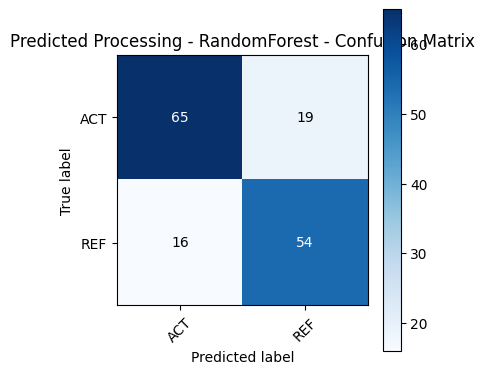

AUC Score: 0.8689625850340136


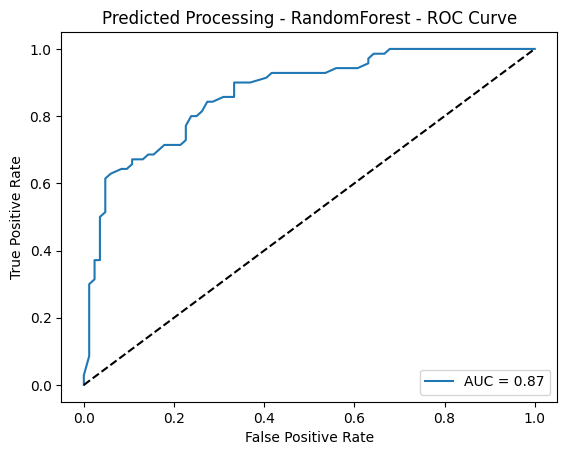


📌 Model: XGBoost
Accuracy: 0.7792207792207793
Precision: 0.7788832234796667
Recall: 0.7792207792207793
Specificity: 0.8095238095238095
F1 Score: 0.7789196310935441
Cohen Kappa: 0.5536992840095465
Log Loss: 0.48686031142872416
Train Time (s): 0.2779080867767334
Test Time (s): 0.0011086463928222656
Confusion Matrix:
 [[68 16]
 [18 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        84
           1       0.76      0.74      0.75        70

    accuracy                           0.78       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.78      0.78      0.78       154



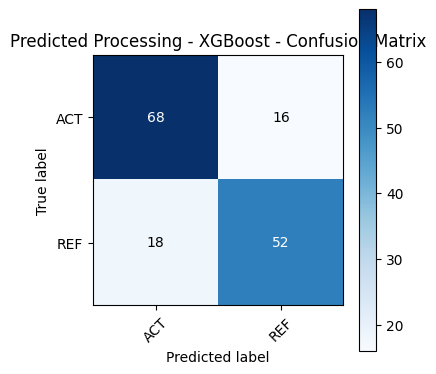

AUC Score: 0.8608843537414966


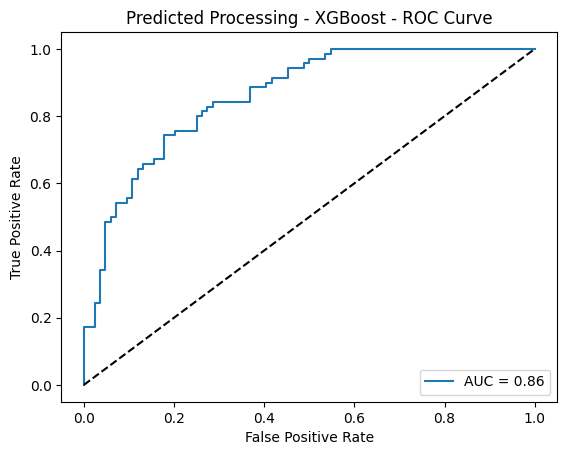


📌 Model: AdaBoost
Accuracy: 0.7207792207792207
Precision: 0.7202797202797202
Recall: 0.7207792207792207
Specificity: 0.7857142857142857
F1 Score: 0.7190157211209842
Cohen Kappa: 0.43217286914765907
Log Loss: 0.5985855314732206
Train Time (s): 0.1427314281463623
Test Time (s): 0.014852046966552734
Confusion Matrix:
 [[66 18]
 [25 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.75        84
           1       0.71      0.64      0.68        70

    accuracy                           0.72       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.72      0.72      0.72       154



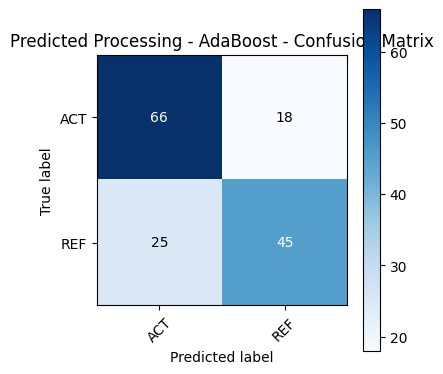

AUC Score: 0.8181972789115647


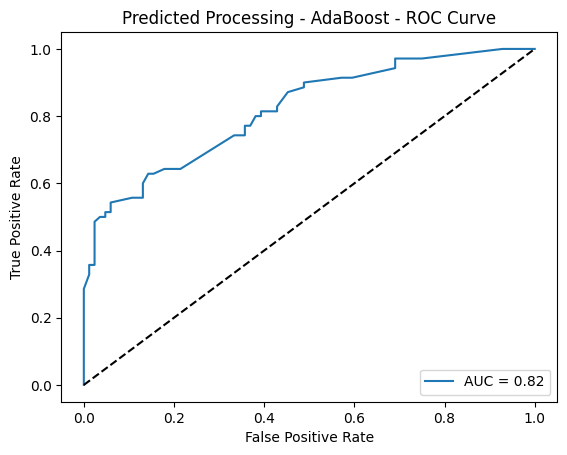


📌 Model: Bagging
Accuracy: 0.7597402597402597
Precision: 0.759409130195647
Recall: 0.7597402597402597
Specificity: 0.8095238095238095
F1 Score: 0.7587629668554523
Cohen Kappa: 0.5125748502994012
Log Loss: 1.135083900646259
Train Time (s): 0.06281256675720215
Test Time (s): 0.0034389495849609375
Confusion Matrix:
 [[68 16]
 [21 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        84
           1       0.75      0.70      0.73        70

    accuracy                           0.76       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.76      0.76      0.76       154



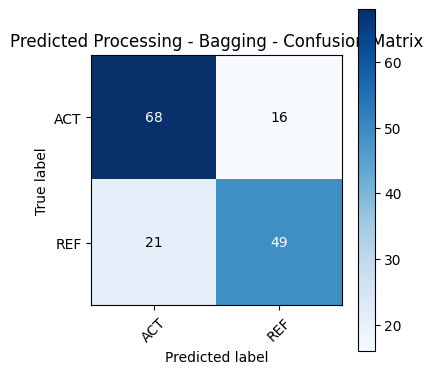

AUC Score: 0.8386054421768708


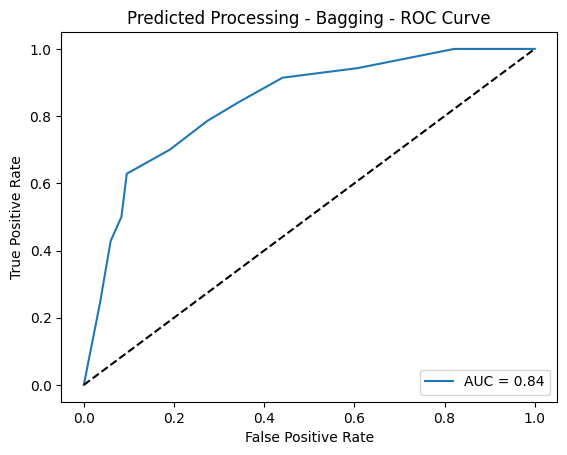


📌 Model: ExtraTrees
Accuracy: 0.7922077922077922
Precision: 0.7954545454545454
Recall: 0.7922077922077922
Specificity: 0.7738095238095238
F1 Score: 0.7926294912596282
Cohen Kappa: 0.5839243498817968
Log Loss: 0.45341101660454225
Train Time (s): 0.20558714866638184
Test Time (s): 0.01589059829711914
Confusion Matrix:
 [[65 19]
 [13 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        84
           1       0.75      0.81      0.78        70

    accuracy                           0.79       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.80      0.79      0.79       154



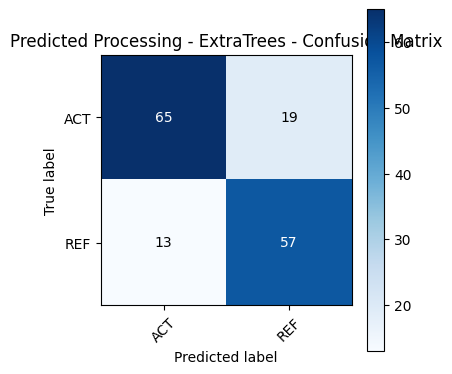

AUC Score: 0.8731292517006802


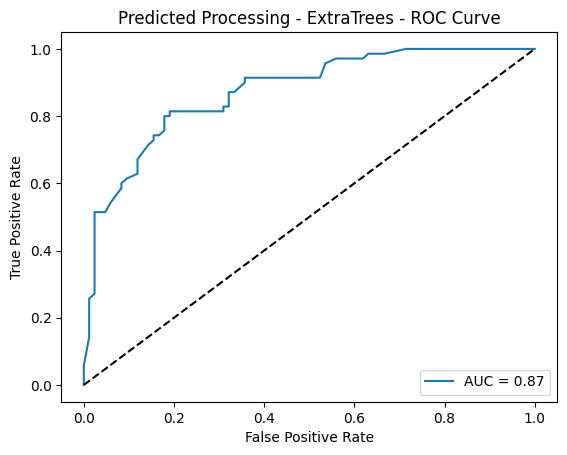


📌 Model: LogisticRegression
Accuracy: 0.7012987012987013
Precision: 0.7032555282555283
Recall: 0.7012987012987013
Specificity: 0.7023809523809523
F1 Score: 0.7018046316826805
Cohen Kappa: 0.4004739336492892
Log Loss: 0.5341451918809144
Train Time (s): 0.01444864273071289
Test Time (s): 0.0002627372741699219
Confusion Matrix:
 [[59 25]
 [21 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72        84
           1       0.66      0.70      0.68        70

    accuracy                           0.70       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.70      0.70      0.70       154



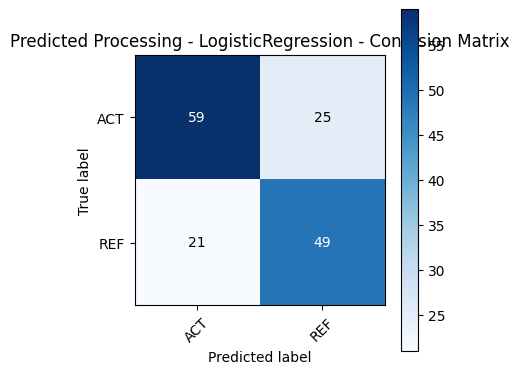

AUC Score: 0.794047619047619


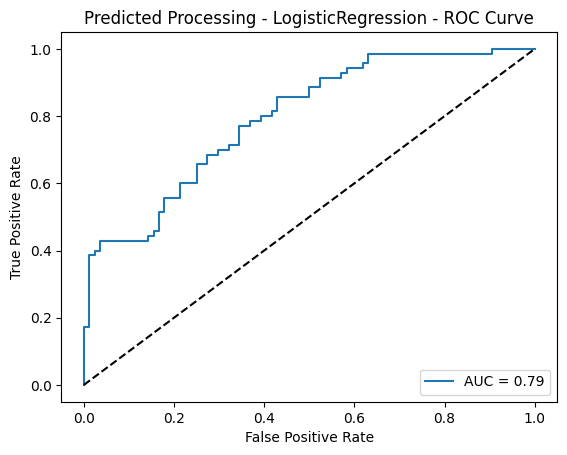


📌 Model: NaiveBayes
Accuracy: 0.6948051948051948
Precision: 0.73414820473644
Recall: 0.6948051948051948
Specificity: 0.9285714285714286
F1 Score: 0.6702492909389461
Cohen Kappa: 0.3577639751552796
Log Loss: 1.7143224905354708
Train Time (s): 0.0014696121215820312
Test Time (s): 0.000484466552734375
Confusion Matrix:
 [[78  6]
 [41 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77        84
           1       0.83      0.41      0.55        70

    accuracy                           0.69       154
   macro avg       0.74      0.67      0.66       154
weighted avg       0.73      0.69      0.67       154



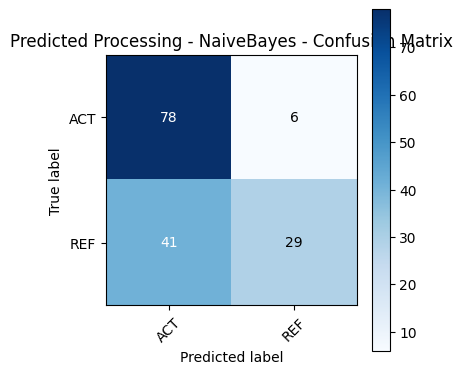

AUC Score: 0.769047619047619


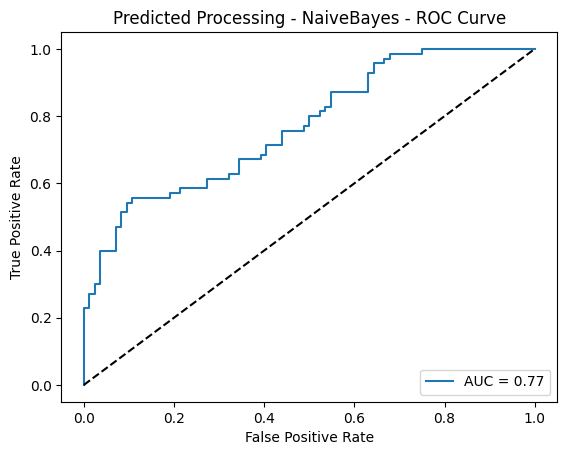


📌 Model: SVM
Accuracy: 0.6623376623376623
Precision: 0.66728008833272
Recall: 0.6623376623376623
Specificity: 0.6428571428571429
F1 Score: 0.663022113022113
Cohen Kappa: 0.32547169811320753
Log Loss: 0.6137823798565915
Train Time (s): 0.05954766273498535
Test Time (s): 0.0033392906188964844
Confusion Matrix:
 [[54 30]
 [22 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.64      0.68        84
           1       0.62      0.69      0.65        70

    accuracy                           0.66       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.67      0.66      0.66       154



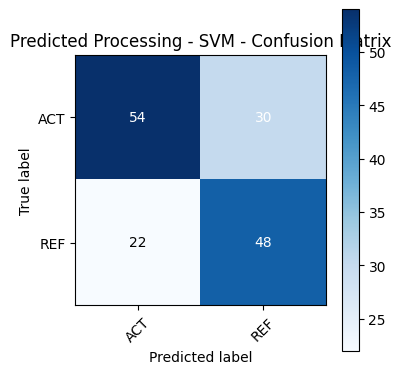

AUC Score: 0.751360544217687


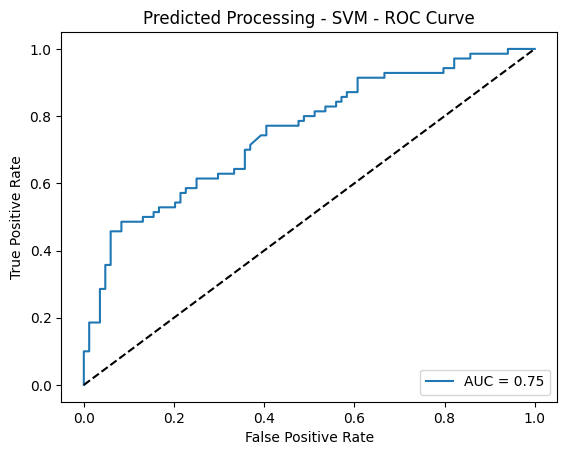


📌 Model: KNN
Accuracy: 0.7077922077922078
Precision: 0.7158495149362729
Recall: 0.7077922077922078
Specificity: 0.6666666666666666
F1 Score: 0.7081989592640455
Cohen Kappa: 0.418331374853114
Log Loss: 1.6143211332519207
Train Time (s): 0.0018374919891357422
Test Time (s): 0.00529026985168457
Confusion Matrix:
 [[56 28]
 [17 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        84
           1       0.65      0.76      0.70        70

    accuracy                           0.71       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.72      0.71      0.71       154



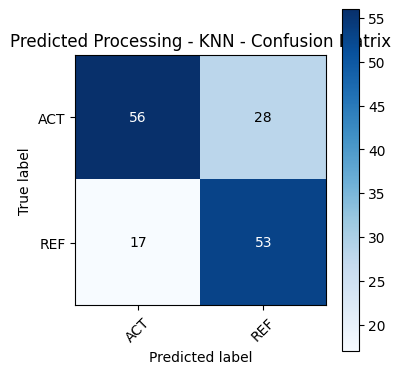

AUC Score: 0.8005952380952381


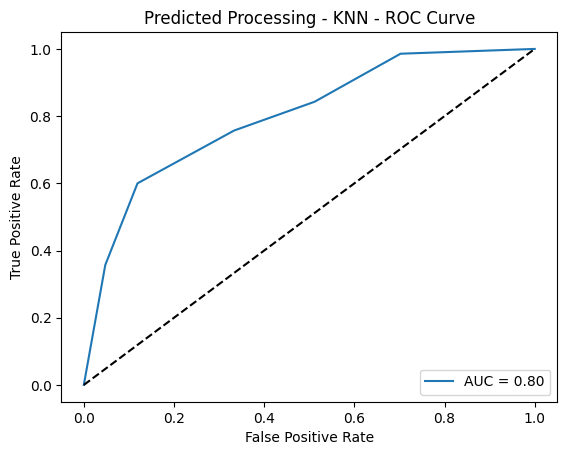


📌 Model: DecisionTree
Accuracy: 0.7662337662337663
Precision: 0.779004329004329
Recall: 0.7662337662337663
Specificity: 0.7023809523809523
F1 Score: 0.7662337662337663
Cohen Kappa: 0.5362997658079626
Log Loss: 8.425789103949464
Train Time (s): 0.005696296691894531
Test Time (s): 0.0003256797790527344
Confusion Matrix:
 [[59 25]
 [11 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.77        84
           1       0.70      0.84      0.77        70

    accuracy                           0.77       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.78      0.77      0.77       154



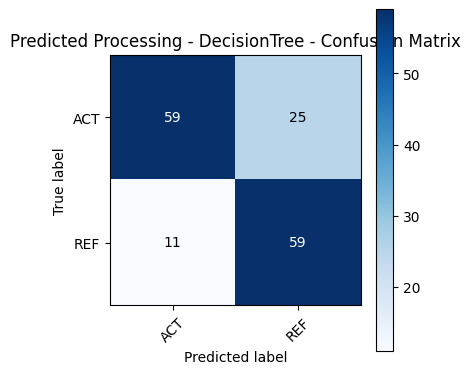

AUC Score: 0.7726190476190476


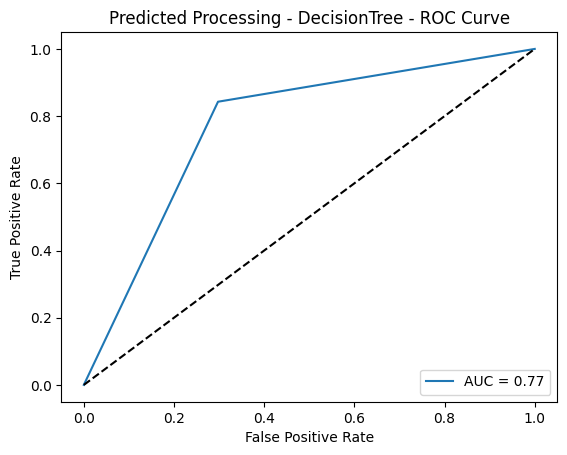


 FILE: Unlabelled_with_Predicted_LabelsPerception.csv | TARGET: Predicted Perception
✅ SMOTE Applied → Class Distribution: [746 746]

📌 Model: RandomForest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.0034505744139652714
Train Time (s): 0.19659185409545898
Test Time (s): 0.0069196224212646484
Confusion Matrix:
 [[153   0]
 [  0 146]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       146

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



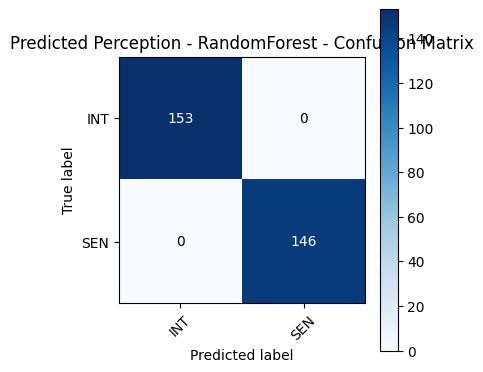

AUC Score: 1.0


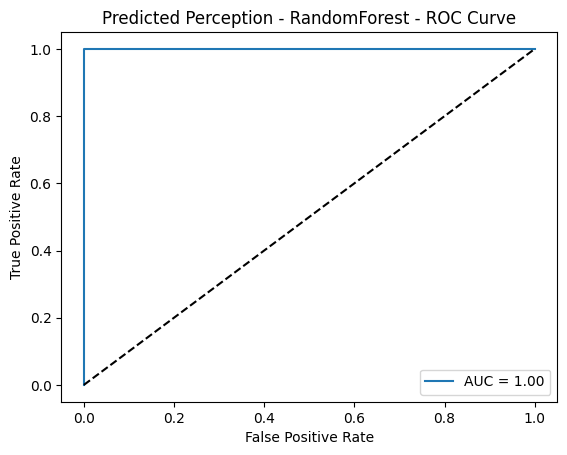


📌 Model: XGBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 2.1904761037724592e-05
Train Time (s): 0.21860051155090332
Test Time (s): 0.0007174015045166016
Confusion Matrix:
 [[153   0]
 [  0 146]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       146

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



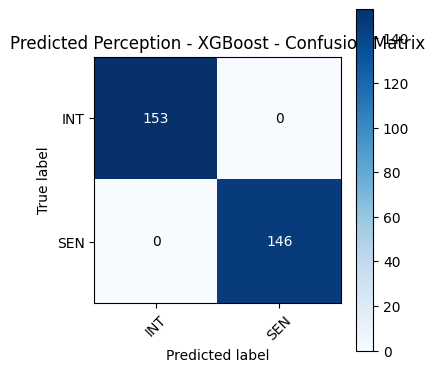

AUC Score: 1.0


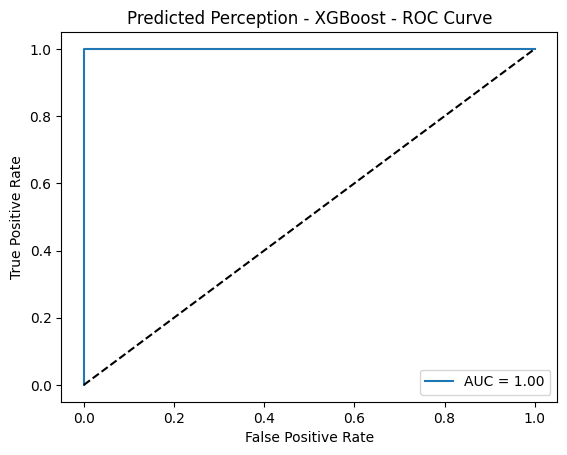


📌 Model: AdaBoost
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.1269280110429727
Train Time (s): 0.004610300064086914
Test Time (s): 0.0005013942718505859
Confusion Matrix:
 [[153   0]
 [  0 146]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       146

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



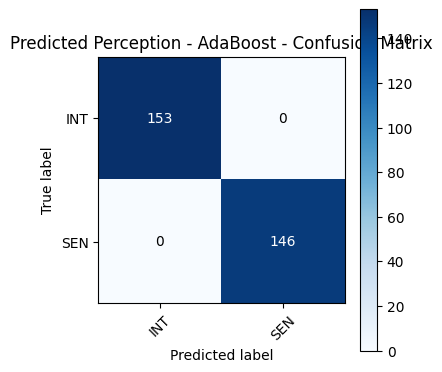

AUC Score: 1.0


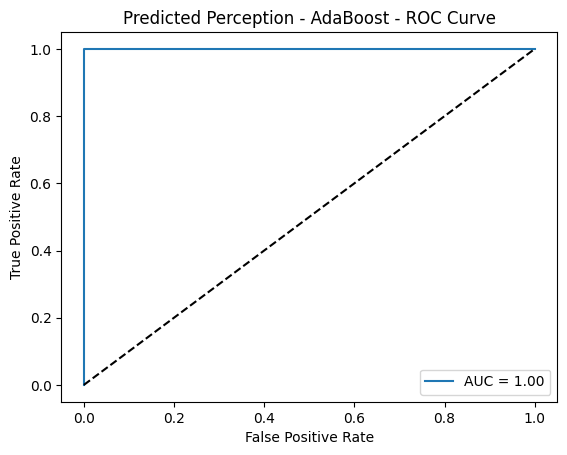


📌 Model: Bagging
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 2.2204460492503136e-16
Train Time (s): 0.03146767616271973
Test Time (s): 0.002129793167114258
Confusion Matrix:
 [[153   0]
 [  0 146]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       146

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



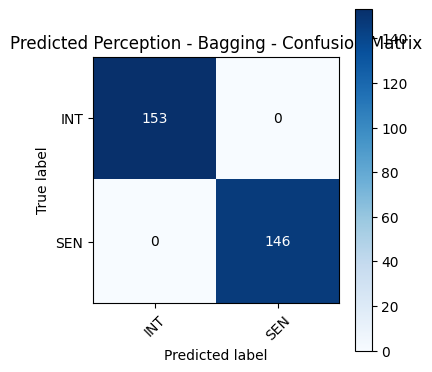

AUC Score: 1.0


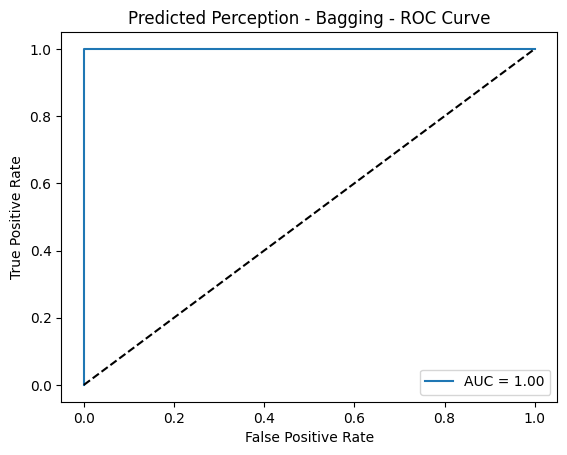


📌 Model: ExtraTrees
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 0.010843205756230266
Train Time (s): 0.12045598030090332
Test Time (s): 0.007672548294067383
Confusion Matrix:
 [[153   0]
 [  0 146]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       146

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



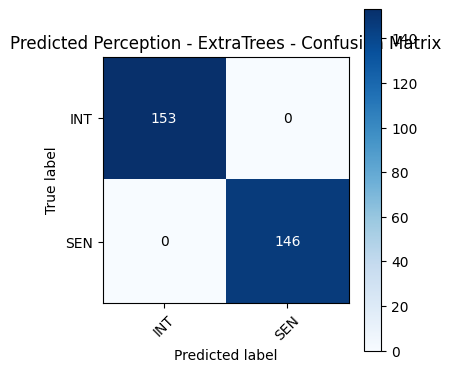

AUC Score: 1.0


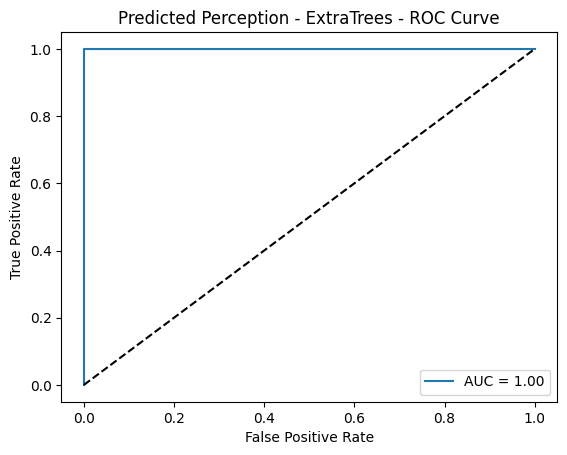


📌 Model: LogisticRegression
Accuracy: 0.9866220735785953
Precision: 0.9869629124683125
Recall: 0.9866220735785953
Specificity: 1.0
F1 Score: 0.9866154805144989
Cohen Kappa: 0.9732126858985845
Log Loss: 0.06269971588895105
Train Time (s): 0.017000675201416016
Test Time (s): 0.000270843505859375
Confusion Matrix:
 [[153   0]
 [  4 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       153
           1       1.00      0.97      0.99       146

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



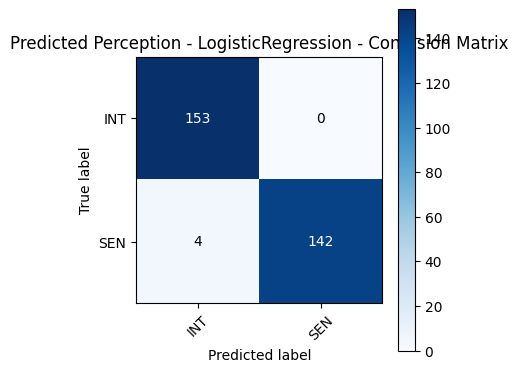

AUC Score: 0.9994180320530038


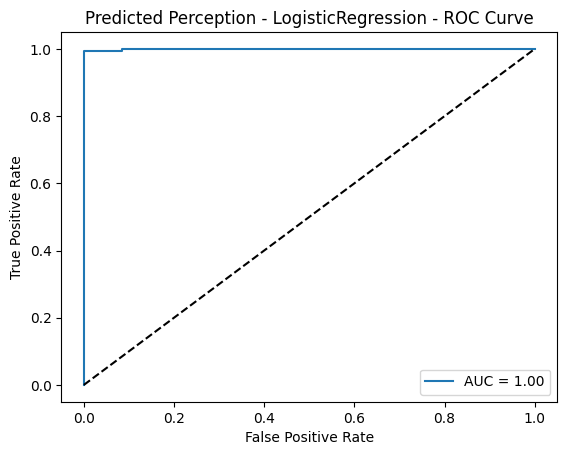


📌 Model: NaiveBayes
Accuracy: 0.9933110367892977
Precision: 0.9933973459920163
Recall: 0.9933110367892977
Specificity: 1.0
F1 Score: 0.9933096888119376
Cohen Kappa: 0.9866105413998477
Log Loss: 0.1324310707708702
Train Time (s): 0.001741647720336914
Test Time (s): 0.0004298686981201172
Confusion Matrix:
 [[153   0]
 [  2 144]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       153
           1       1.00      0.99      0.99       146

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



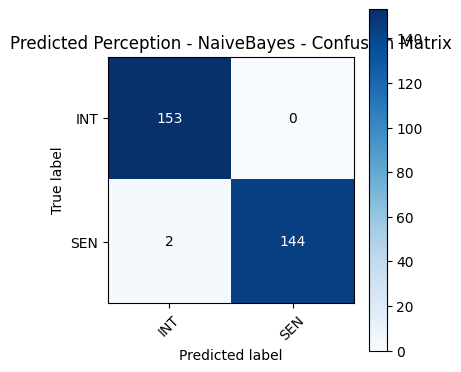

AUC Score: 0.9974482943862477


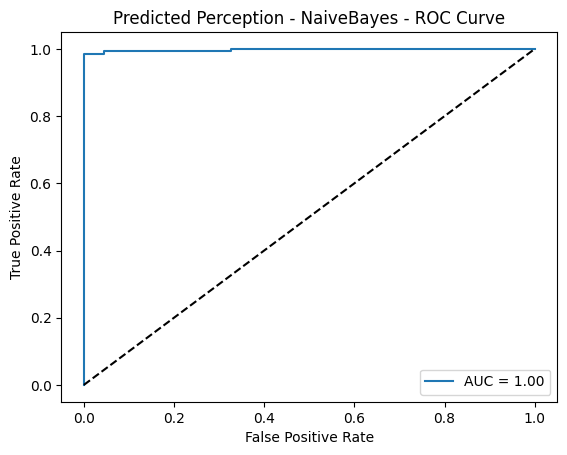


📌 Model: SVM
Accuracy: 0.9899665551839465
Precision: 0.9901595060457935
Recall: 0.9899665551839465
Specificity: 1.0
F1 Score: 0.9899631845235454
Cohen Kappa: 0.9799126637554585
Log Loss: 0.017706022464602074
Train Time (s): 0.06985068321228027
Test Time (s): 0.0025751590728759766
Confusion Matrix:
 [[153   0]
 [  3 143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       1.00      0.98      0.99       146

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



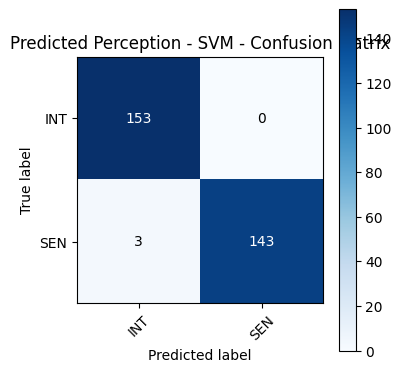

AUC Score: 1.0


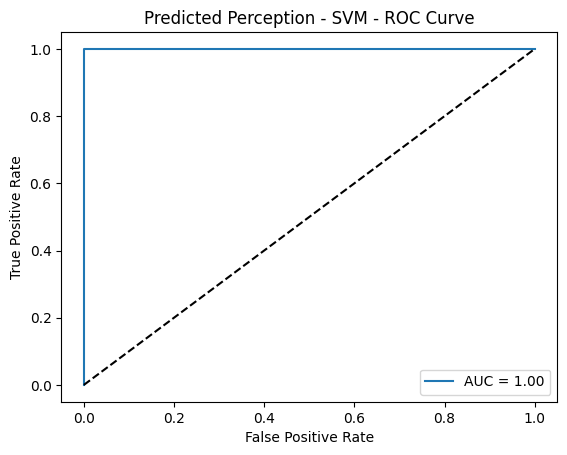


📌 Model: KNN
Accuracy: 0.979933110367893
Precision: 0.9806903514860855
Recall: 0.979933110367893
Specificity: 1.0
F1 Score: 0.9799155693804522
Cohen Kappa: 0.959806425594838
Log Loss: 0.3794193411431522
Train Time (s): 0.0026917457580566406
Test Time (s): 0.008760452270507812
Confusion Matrix:
 [[153   0]
 [  6 140]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       153
           1       1.00      0.96      0.98       146

    accuracy                           0.98       299
   macro avg       0.98      0.98      0.98       299
weighted avg       0.98      0.98      0.98       299



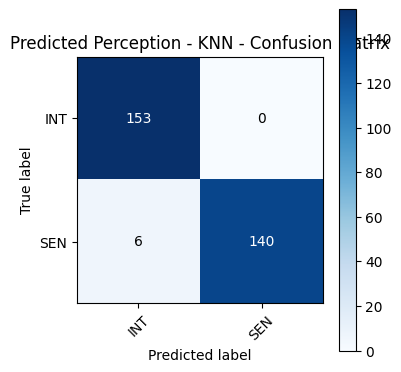

AUC Score: 0.9897260273972603


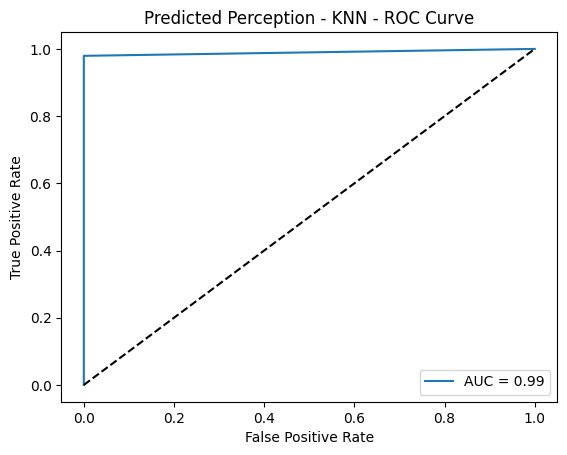


📌 Model: DecisionTree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0
F1 Score: 1.0
Cohen Kappa: 1.0
Log Loss: 2.2204460492503136e-16
Train Time (s): 0.003030538558959961
Test Time (s): 0.0003643035888671875
Confusion Matrix:
 [[153   0]
 [  0 146]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       146

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



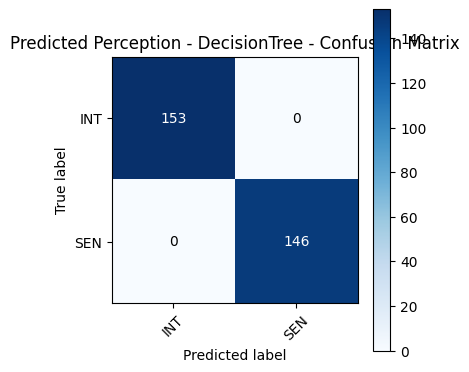

AUC Score: 1.0


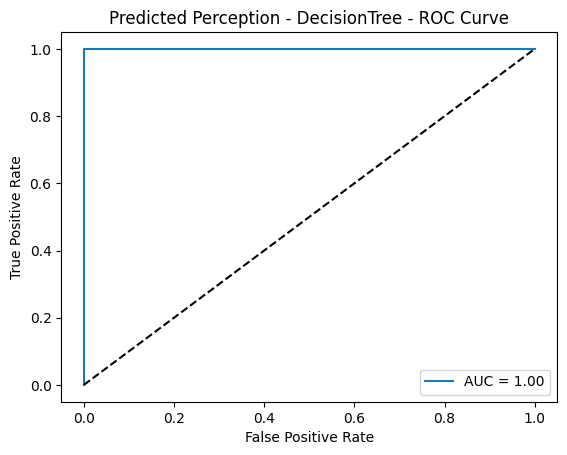


 FILE: Unlabelled_with_Predicted_LabelsInput.csv | TARGET: Predicted Input
⚠️ SMOTE Skipped → Not enough samples in smallest class: 4

📌 Model: RandomForest
Accuracy: 0.9933774834437086
Precision: 0.9867988246129555
Recall: 0.9933774834437086
Specificity: 1.0
F1 Score: 0.9900772260236298
Cohen Kappa: 0.0
Log Loss: 0.02639703208645261
Train Time (s): 0.15389060974121094
Test Time (s): 0.006237983703613281
Confusion Matrix:
 [[150   0]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


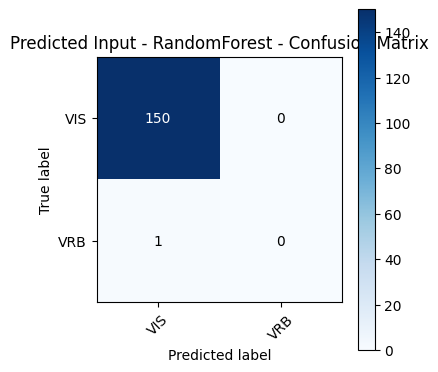

AUC Score: 0.9733333333333333


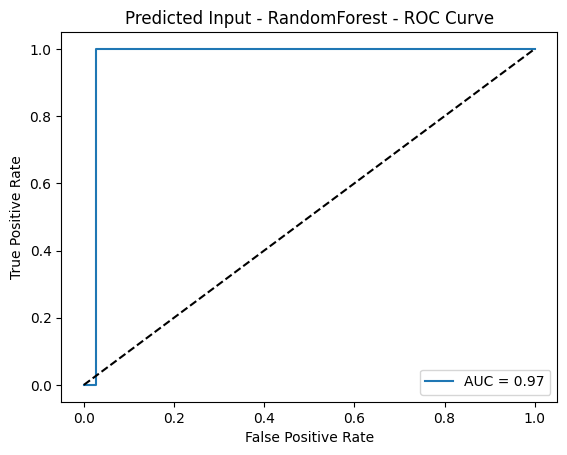


📌 Model: XGBoost
Accuracy: 0.9867549668874173
Precision: 0.9867549668874173
Recall: 0.9867549668874173
Specificity: 0.9933333333333333
F1 Score: 0.9867549668874173
Cohen Kappa: -0.006666666666666599
Log Loss: 0.26338739171329467
Train Time (s): 0.20204591751098633
Test Time (s): 0.0006735324859619141
Confusion Matrix:
 [[149   1]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



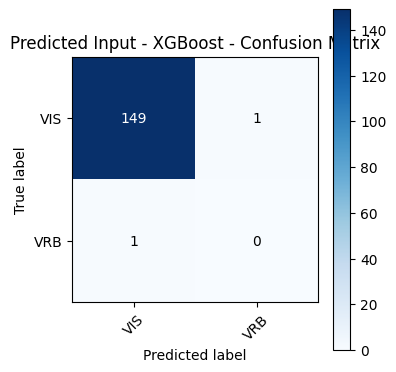

AUC Score: 0.06666666666666665


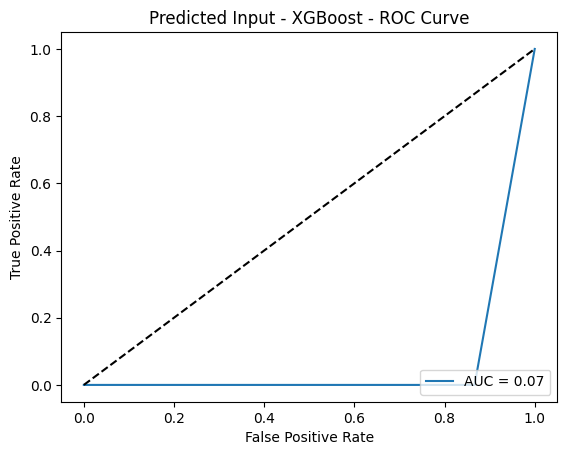


📌 Model: AdaBoost
Accuracy: 0.9867549668874173
Precision: 0.9867549668874173
Recall: 0.9867549668874173
Specificity: 0.9933333333333333
F1 Score: 0.9867549668874173
Cohen Kappa: -0.006666666666666599
Log Loss: 0.3054735365580368
Train Time (s): 0.1013479232788086
Test Time (s): 0.00787210464477539
Confusion Matrix:
 [[149   1]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



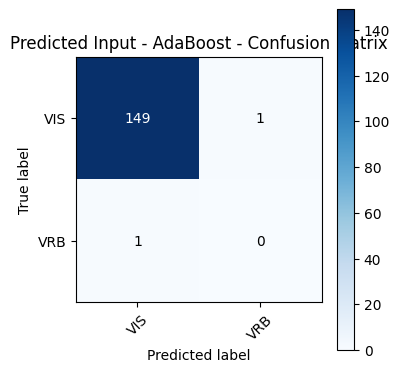

AUC Score: 0.8999999999999999


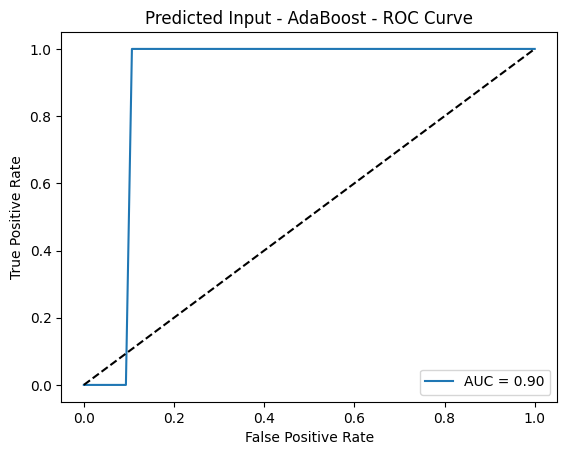


📌 Model: Bagging
Accuracy: 0.9867549668874173
Precision: 0.9867549668874173
Recall: 0.9867549668874173
Specificity: 0.9933333333333333
F1 Score: 0.9867549668874173
Cohen Kappa: -0.006666666666666599
Log Loss: 0.25075372405872143
Train Time (s): 0.03256034851074219
Test Time (s): 0.0019559860229492188
Confusion Matrix:
 [[149   1]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



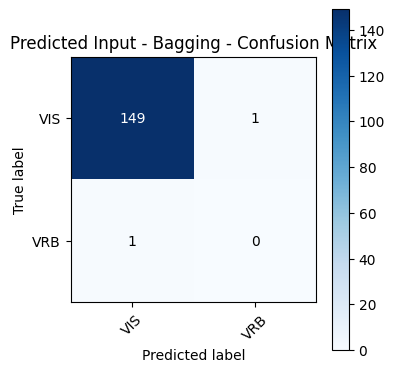

AUC Score: 0.49


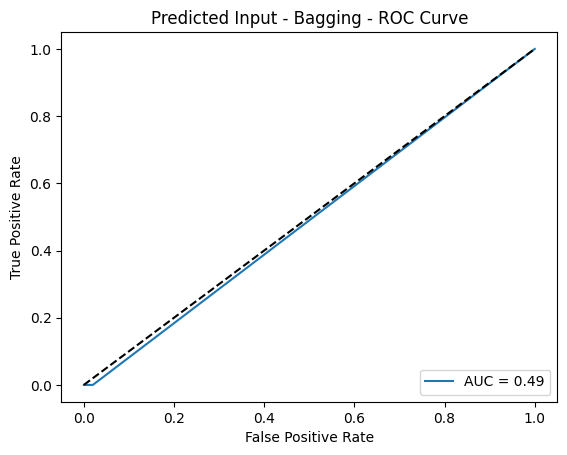


📌 Model: ExtraTrees
Accuracy: 0.9933774834437086
Precision: 0.9867988246129555
Recall: 0.9933774834437086
Specificity: 1.0
F1 Score: 0.9900772260236298
Cohen Kappa: 0.0
Log Loss: 0.24552637279946135
Train Time (s): 0.12177228927612305
Test Time (s): 0.009182929992675781
Confusion Matrix:
 [[150   0]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


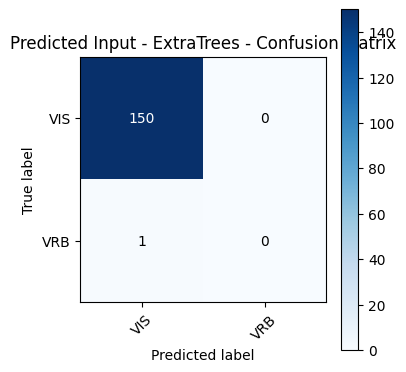

AUC Score: 0.44


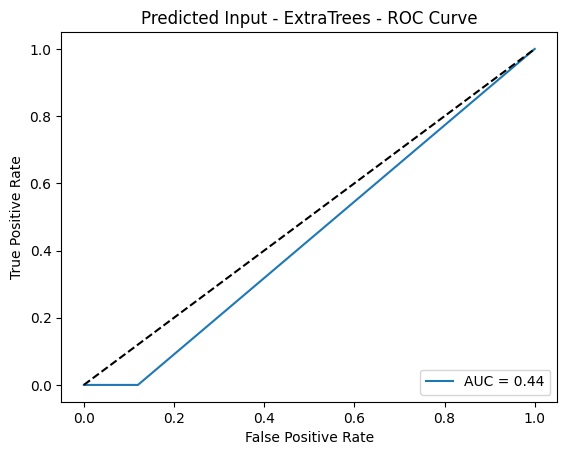


📌 Model: LogisticRegression
Accuracy: 0.9867549668874173
Precision: 0.9867549668874173
Recall: 0.9867549668874173
Specificity: 0.9933333333333333
F1 Score: 0.9867549668874173
Cohen Kappa: -0.006666666666666599
Log Loss: 0.0315175876204052
Train Time (s): 0.033225297927856445
Test Time (s): 0.00028824806213378906
Confusion Matrix:
 [[149   1]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



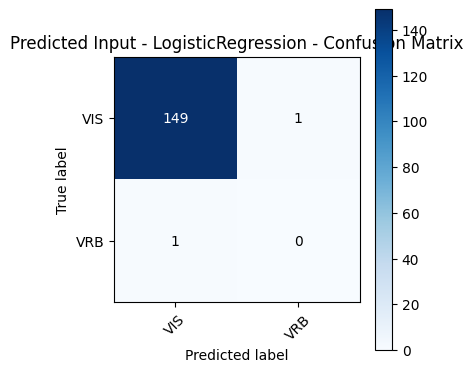

AUC Score: 0.9733333333333334


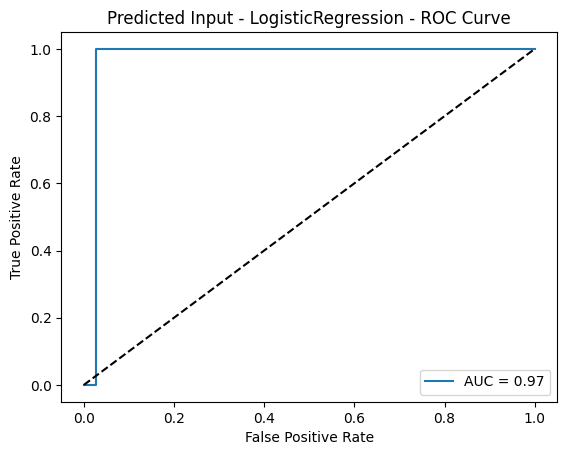


📌 Model: NaiveBayes
Accuracy: 0.9536423841059603
Precision: 0.9942052980132451
Recall: 0.9536423841059603
Specificity: 0.9533333333333334
F1 Score: 0.9711165859257083
Cohen Kappa: 0.2129560685033507
Log Loss: 0.5932799276005758
Train Time (s): 0.0014986991882324219
Test Time (s): 0.0003943443298339844
Confusion Matrix:
 [[143   7]
 [  0   1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       150
           1       0.12      1.00      0.22         1

    accuracy                           0.95       151
   macro avg       0.56      0.98      0.60       151
weighted avg       0.99      0.95      0.97       151



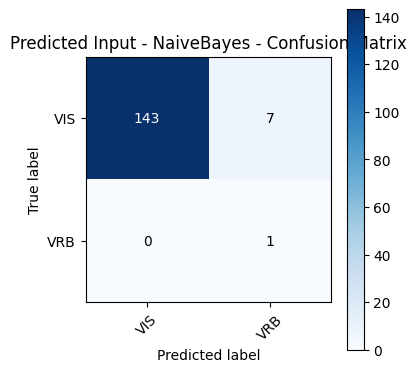

AUC Score: 1.0


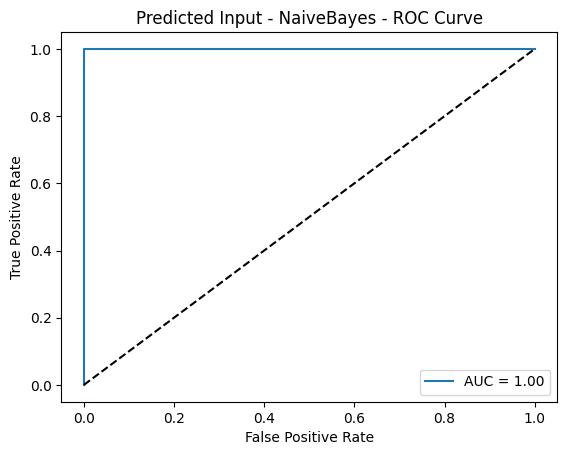


📌 Model: SVM
Accuracy: 0.9933774834437086
Precision: 0.9867988246129555
Recall: 0.9933774834437086
Specificity: 1.0
F1 Score: 0.9900772260236298
Cohen Kappa: 0.0
Log Loss: 0.0432397325624242
Train Time (s): 0.01984572410583496
Test Time (s): 0.0013878345489501953
Confusion Matrix:
 [[150   0]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


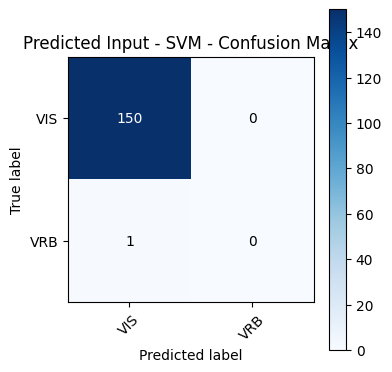

AUC Score: 0.9866666666666667


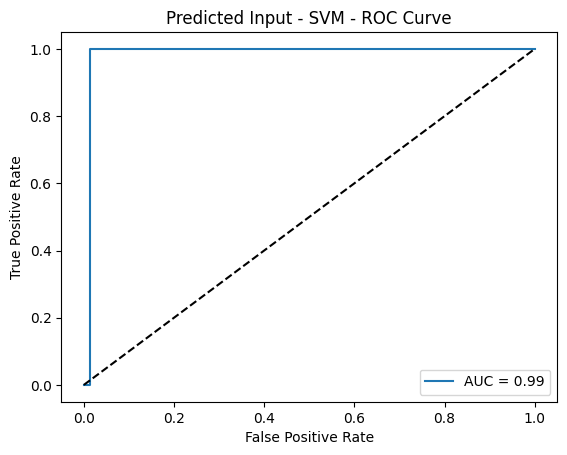


📌 Model: KNN
Accuracy: 0.9933774834437086
Precision: 0.9867988246129555
Recall: 0.9933774834437086
Specificity: 1.0
F1 Score: 0.9900772260236298
Cohen Kappa: 0.0
Log Loss: 0.24017746318166483
Train Time (s): 0.004099369049072266
Test Time (s): 0.0048639774322509766
Confusion Matrix:
 [[150   0]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


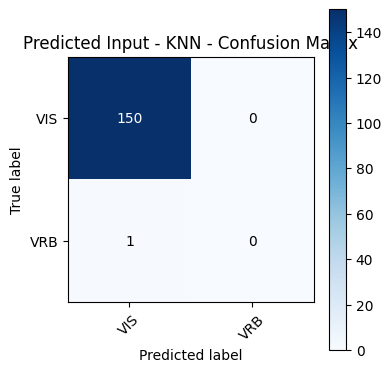

AUC Score: 0.49666666666666665


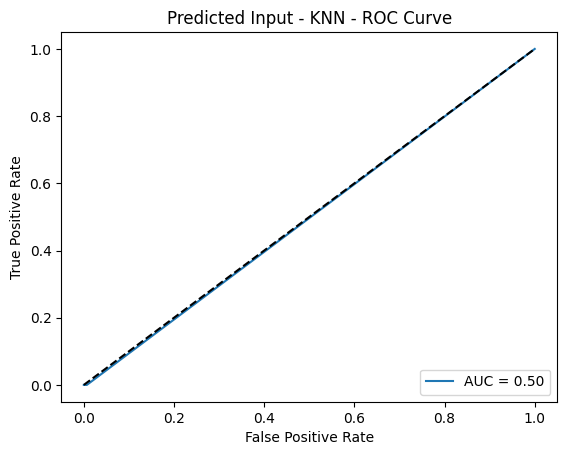


📌 Model: DecisionTree
Accuracy: 0.9867549668874173
Precision: 0.9867549668874173
Recall: 0.9867549668874173
Specificity: 0.9933333333333333
F1 Score: 0.9867549668874173
Cohen Kappa: -0.006666666666666599
Log Loss: 0.47739938263731346
Train Time (s): 0.0037403106689453125
Test Time (s): 0.000339508056640625
Confusion Matrix:
 [[149   1]
 [  1   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.00      0.00      0.00         1

    accuracy                           0.99       151
   macro avg       0.50      0.50      0.50       151
weighted avg       0.99      0.99      0.99       151



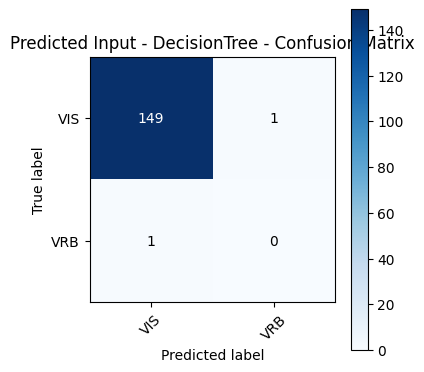

AUC Score: 0.49666666666666665


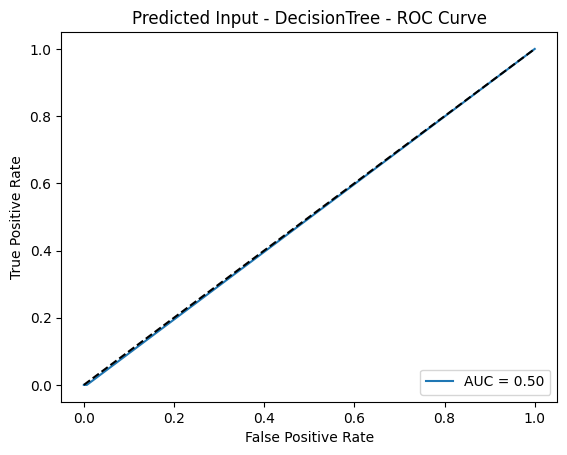


 FILE: Unlabelled_with_Predicted_LabelsUnderstanding.csv | TARGET: Predicted Understanding
✅ SMOTE Applied → Class Distribution: [666 666]

📌 Model: RandomForest
Accuracy: 0.9363295880149812
Precision: 0.936986532326285
Recall: 0.9363295880149812
Specificity: 0.9541984732824428
F1 Score: 0.9363295880149812
Cohen Kappa: 0.8727038169223434
Log Loss: 0.17131968953696886
Train Time (s): 0.26926469802856445
Test Time (s): 0.0074710845947265625
Confusion Matrix:
 [[125   6]
 [ 11 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       131
           1       0.95      0.92      0.94       136

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267



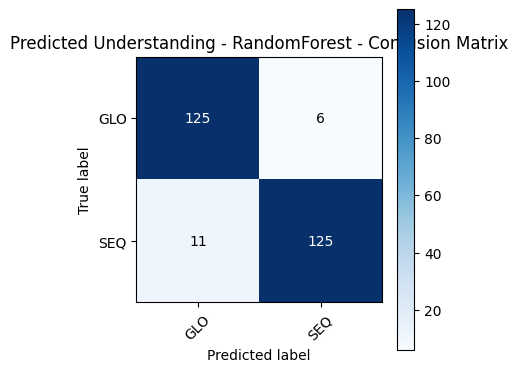

AUC Score: 0.987679613830265


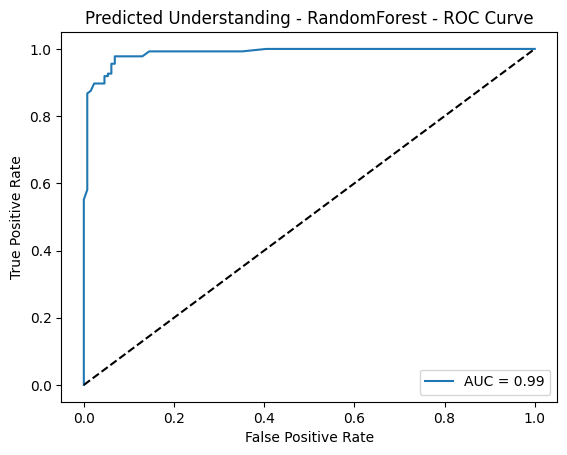


📌 Model: XGBoost
Accuracy: 0.9438202247191011
Precision: 0.9444824245848953
Recall: 0.9438202247191011
Specificity: 0.9618320610687023
F1 Score: 0.9438202247191011
Cohen Kappa: 0.8876798384608913
Log Loss: 0.15964832087251576
Train Time (s): 0.5138332843780518
Test Time (s): 0.0013649463653564453
Confusion Matrix:
 [[126   5]
 [ 10 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       131
           1       0.96      0.93      0.94       136

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267



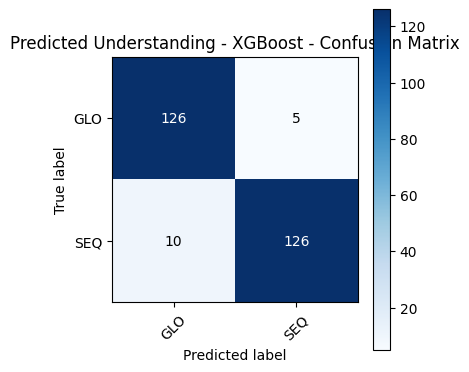

AUC Score: 0.9843399191737763


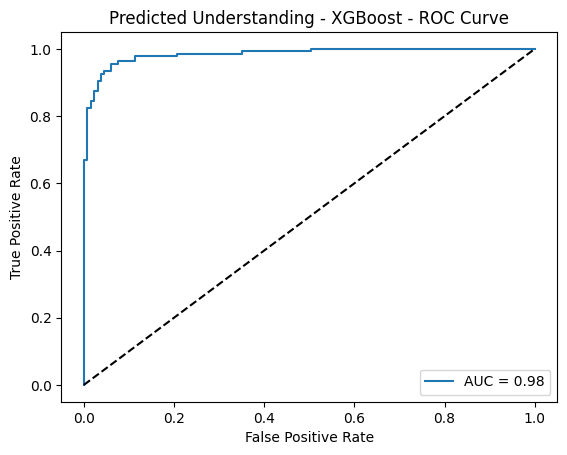


📌 Model: AdaBoost
Accuracy: 0.9026217228464419
Precision: 0.9026217228464419
Recall: 0.9026217228464419
Specificity: 0.9007633587786259
F1 Score: 0.9026217228464419
Cohen Kappa: 0.8051751234845084
Log Loss: 0.5348267885798218
Train Time (s): 0.1800537109375
Test Time (s): 0.012889862060546875
Confusion Matrix:
 [[118  13]
 [ 13 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       131
           1       0.90      0.90      0.90       136

    accuracy                           0.90       267
   macro avg       0.90      0.90      0.90       267
weighted avg       0.90      0.90      0.90       267



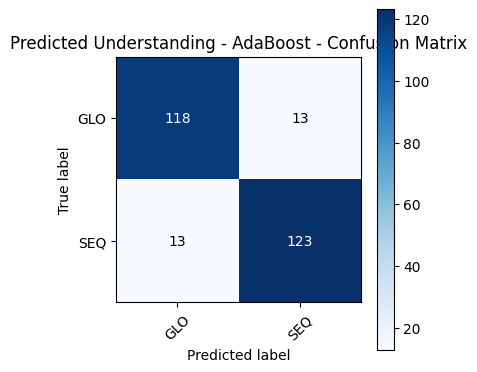

AUC Score: 0.9736472833408173


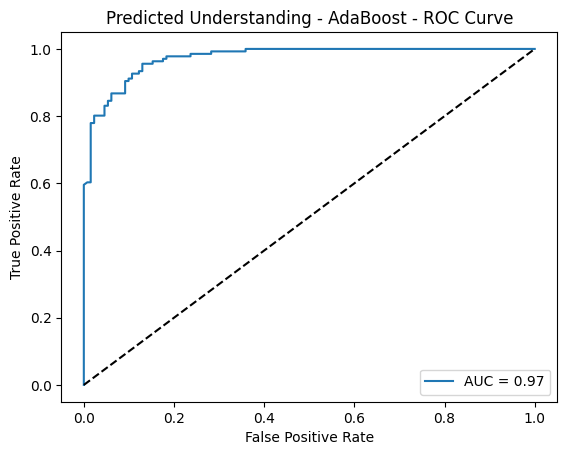


📌 Model: Bagging
Accuracy: 0.947565543071161
Precision: 0.9485143850927497
Recall: 0.947565543071161
Specificity: 0.9694656488549618
F1 Score: 0.9475611298916417
Cohen Kappa: 0.8951825472491728
Log Loss: 0.7792727926887936
Train Time (s): 0.11588430404663086
Test Time (s): 0.003785371780395508
Confusion Matrix:
 [[127   4]
 [ 10 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       131
           1       0.97      0.93      0.95       136

    accuracy                           0.95       267
   macro avg       0.95      0.95      0.95       267
weighted avg       0.95      0.95      0.95       267



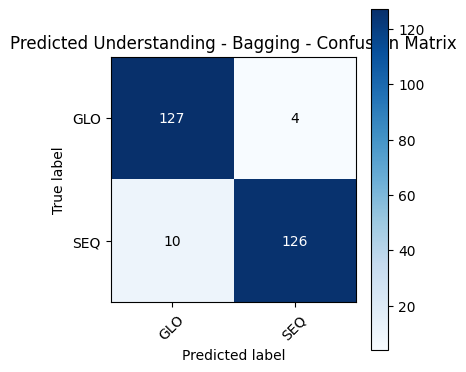

AUC Score: 0.9712617871576112


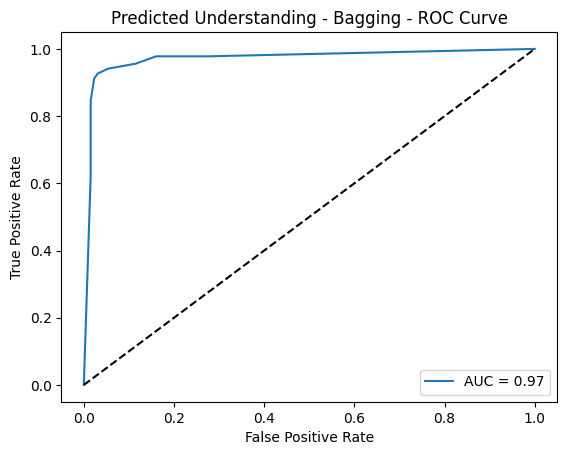


📌 Model: ExtraTrees
Accuracy: 0.9438202247191011
Precision: 0.9450970664828721
Recall: 0.9438202247191011
Specificity: 0.9694656488549618
F1 Score: 0.9438091913059856
Cohen Kappa: 0.887711329800656
Log Loss: 0.1695717009000407
Train Time (s): 0.21396470069885254
Test Time (s): 0.016022920608520508
Confusion Matrix:
 [[127   4]
 [ 11 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       131
           1       0.97      0.92      0.94       136

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.95      0.94      0.94       267



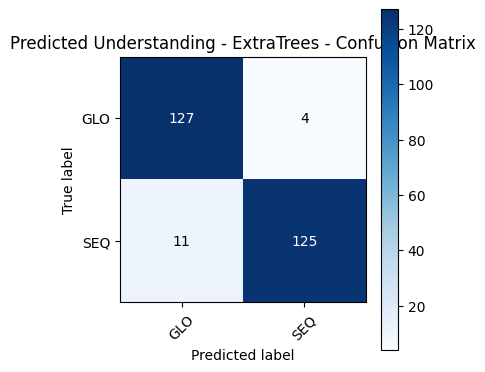

AUC Score: 0.9899809160305344


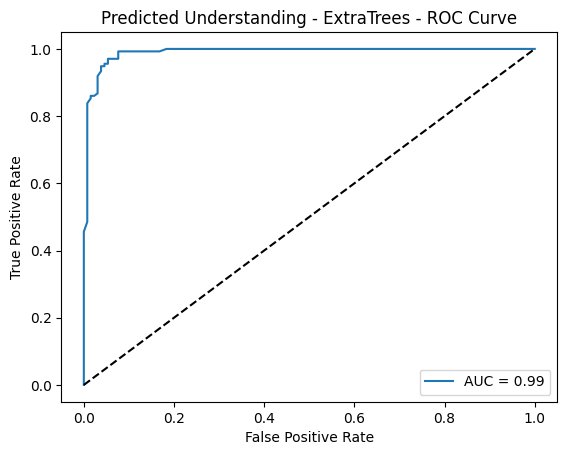


📌 Model: LogisticRegression
Accuracy: 0.7827715355805244
Precision: 0.787367831027542
Recall: 0.7827715355805244
Specificity: 0.8396946564885496
F1 Score: 0.7822343248996309
Cohen Kappa: 0.566364247311828
Log Loss: 0.4549448685318533
Train Time (s): 0.012064218521118164
Test Time (s): 0.00029969215393066406
Confusion Matrix:
 [[110  21]
 [ 37  99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       131
           1       0.82      0.73      0.77       136

    accuracy                           0.78       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.78      0.78       267



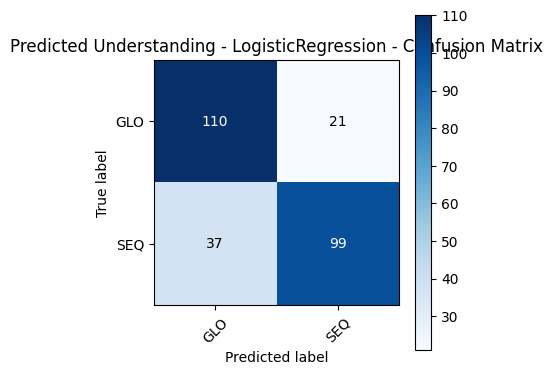

AUC Score: 0.8718006286484059


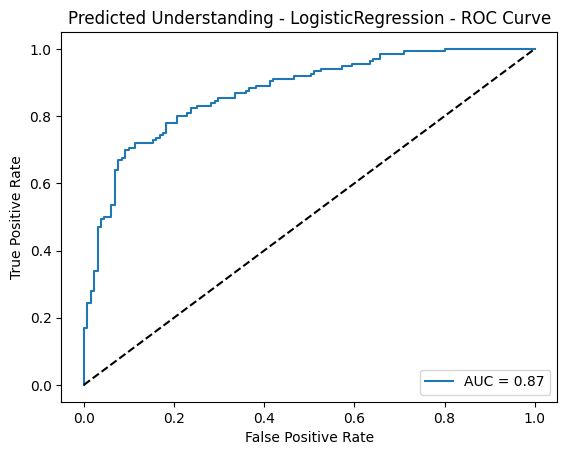


📌 Model: NaiveBayes
Accuracy: 0.7378277153558053
Precision: 0.7600671543133576
Recall: 0.7378277153558053
Specificity: 0.8778625954198473
F1 Score: 0.733144466852332
Cohen Kappa: 0.4782535871810619
Log Loss: 1.6234051904645992
Train Time (s): 0.002180337905883789
Test Time (s): 0.0004401206970214844
Confusion Matrix:
 [[115  16]
 [ 54  82]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.88      0.77       131
           1       0.84      0.60      0.70       136

    accuracy                           0.74       267
   macro avg       0.76      0.74      0.73       267
weighted avg       0.76      0.74      0.73       267



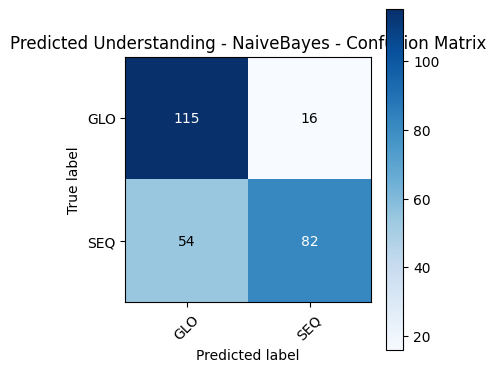

AUC Score: 0.8295352492141894


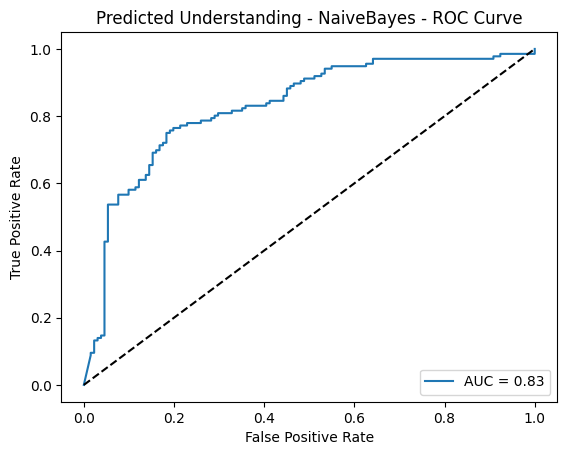


📌 Model: SVM
Accuracy: 0.846441947565543
Precision: 0.8524973609243273
Recall: 0.846441947565543
Specificity: 0.9083969465648855
F1 Score: 0.846001637737774
Cohen Kappa: 0.6935072934456982
Log Loss: 0.3515300882842453
Train Time (s): 0.130828857421875
Test Time (s): 0.005732059478759766
Confusion Matrix:
 [[119  12]
 [ 29 107]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       131
           1       0.90      0.79      0.84       136

    accuracy                           0.85       267
   macro avg       0.85      0.85      0.85       267
weighted avg       0.85      0.85      0.85       267



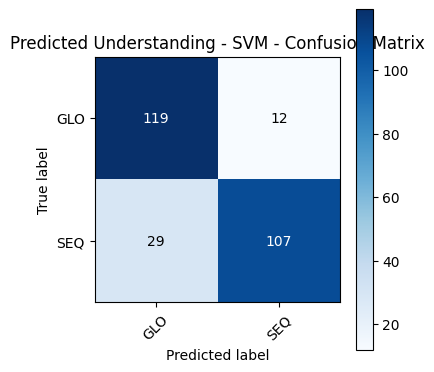

AUC Score: 0.9283789851818591


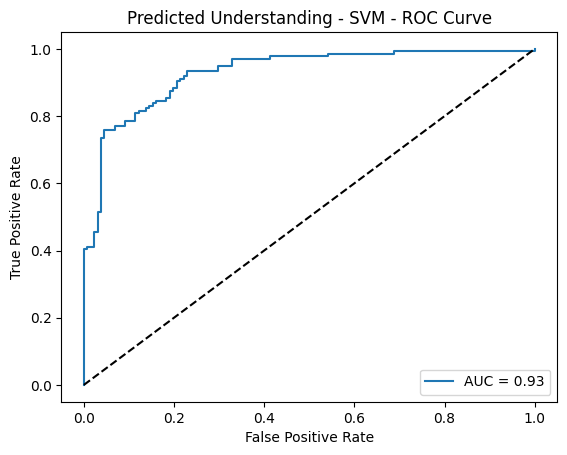


📌 Model: KNN
Accuracy: 0.8801498127340824
Precision: 0.8931773071678835
Recall: 0.8801498127340824
Specificity: 0.9694656488549618
F1 Score: 0.8793792893104238
Cohen Kappa: 0.761020362497203
Log Loss: 1.7720863173630639
Train Time (s): 0.0025420188903808594
Test Time (s): 0.009671211242675781
Confusion Matrix:
 [[127   4]
 [ 28 108]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       131
           1       0.96      0.79      0.87       136

    accuracy                           0.88       267
   macro avg       0.89      0.88      0.88       267
weighted avg       0.89      0.88      0.88       267



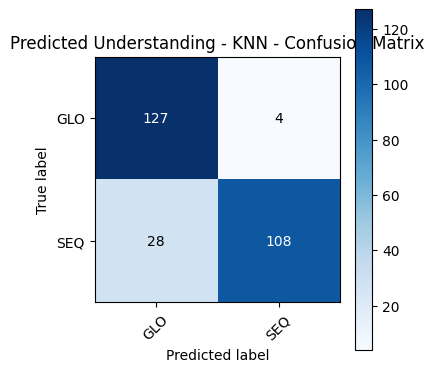

AUC Score: 0.937471935339021


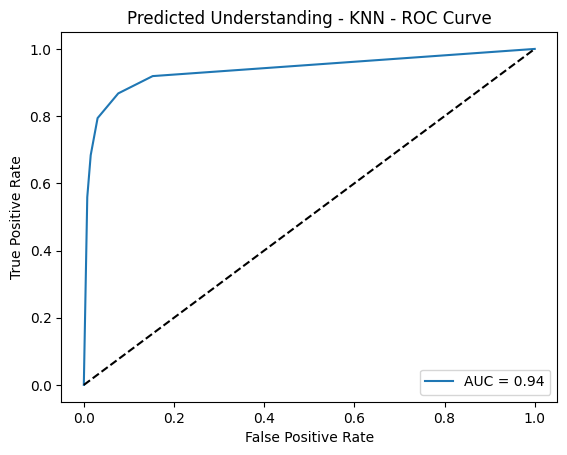


📌 Model: DecisionTree
Accuracy: 0.9325842696629213
Precision: 0.933515447072406
Recall: 0.9325842696629213
Specificity: 0.9541984732824428
F1 Score: 0.9325785955749679
Cohen Kappa: 0.8652347036060792
Log Loss: 2.429909217243853
Train Time (s): 0.01139211654663086
Test Time (s): 0.0003540515899658203
Confusion Matrix:
 [[125   6]
 [ 12 124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       131
           1       0.95      0.91      0.93       136

    accuracy                           0.93       267
   macro avg       0.93      0.93      0.93       267
weighted avg       0.93      0.93      0.93       267



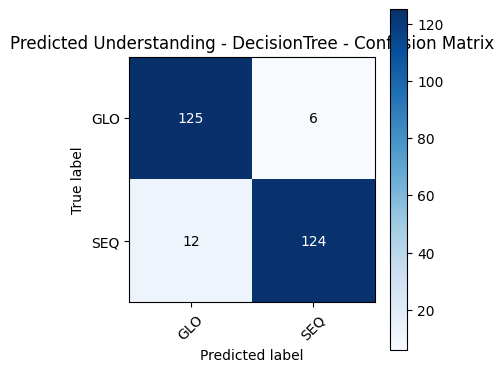

AUC Score: 0.9329815895823979


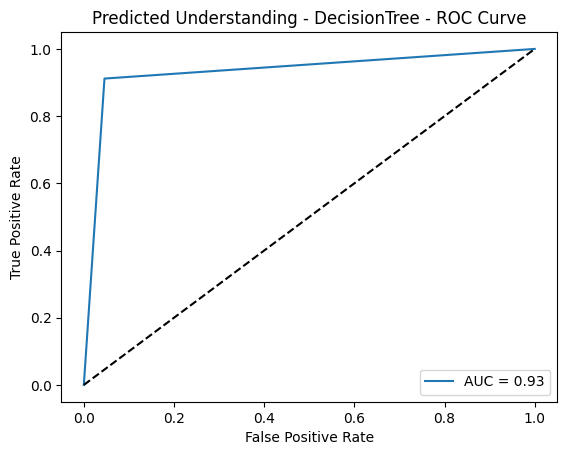

In [33]:
# INSTALL LIBRARIES (uncomment if needed)
# !pip install imbalanced-learn scikit-learn matplotlib

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, cohen_kappa_score, log_loss
from imblearn.over_sampling import SMOTE

# FILES AND TARGET COLUMNS
files_targets = {
    "Unlabelled_with_Predicted_LabelsProcessing.csv": "Predicted Processing",
    "Unlabelled_with_Predicted_LabelsPerception.csv": "Predicted Perception",
    "Unlabelled_with_Predicted_LabelsInput.csv": "Predicted Input",
    "Unlabelled_with_Predicted_LabelsUnderstanding.csv": "Predicted Understanding"
}

# INPUT COLUMNS
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# LOOP THROUGH FILES
for file, target_column in files_targets.items():
    print("\n=============================")
    print(" FILE:", file, "| TARGET:", target_column)
    print("=============================")

    # Load data
    df = pd.read_csv("/content/" + file)
    X = df[input_cols]
    y = df[target_column]

    # Encode target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Scale inputs
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # SMOTE -> Safe Handling
    class_counts = Counter(y_encoded)
    min_class_samples = min(class_counts.values())

    if min_class_samples > 5:
        smote = SMOTE(random_state=42)
        X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)
        print("✅ SMOTE Applied → Class Distribution:", np.bincount(y_balanced))
    else:
        X_balanced, y_balanced = X_scaled, y_encoded
        print("⚠️ SMOTE Skipped → Not enough samples in smallest class:", min_class_samples)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Models
    models = {
        "RandomForest": RandomForestClassifier(),
        "XGBoost": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "NaiveBayes": GaussianNB(),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier(),
        "DecisionTree": DecisionTreeClassifier()
    }

    # Train + Evaluate
    for name, model in models.items():
        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        train_time = end_train - start_train

        start_test = time.time()
        y_pred = model.predict(X_test)
        end_test = time.time()
        test_time = end_test - start_test

        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") and len(np.unique(y_train)) == 2 else None

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        cm = confusion_matrix(y_test, y_pred, labels=le.transform(le.classes_))
        kappa = cohen_kappa_score(y_test, y_pred)
        logloss = log_loss(y_test, model.predict_proba(X_test)) if hasattr(model, "predict_proba") else "N/A"

        # Safe Specificity Calculation
        if cm.shape[0] > 1:
            specificity = cm[0][0] / (cm[0][0] + cm[0][1]) if (cm[0][0] + cm[0][1]) != 0 else 0
        else:
            specificity = "N/A (Only one class in y_test)"

        print("\n📌 Model:", name)
        print("Accuracy:", acc)
        print("Precision:", precision)
        print("Recall:", recall)
        print("Specificity:", specificity)
        print("F1 Score:", f1)
        print("Cohen Kappa:", kappa)
        print("Log Loss:", logloss)
        print("Train Time (s):", train_time)
        print("Test Time (s):", test_time)
        print("Confusion Matrix:\n", cm)
        print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

        # Confusion Matrix plot
        if cm.shape[0] > 1:
            plt.figure(figsize=(4, 4))
            plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            plt.title(f"{target_column} - {name} - Confusion Matrix")
            plt.colorbar()
            plt.xticks(np.arange(len(le.classes_)), le.classes_, rotation=45)
            plt.yticks(np.arange(len(le.classes_)), le.classes_)
            plt.xlabel('Predicted label')
            plt.ylabel('True label')

            thresh = cm.max() / 2
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                             color="white" if cm[i, j] > thresh else "black")
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ Skipping confusion matrix plot (only one class in test set)")

        # ROC Curve
        if y_proba is not None and len(np.unique(y_test)) == 2:
            auc = roc_auc_score(y_test, y_proba)
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            print("AUC Score:", auc)

            plt.figure()
            plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f"{target_column} - {name} - ROC Curve")
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.show()
        else:
            print("⚠️ ROC curve not plotted (requires binary classification with probability output)")


In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer

# Load the balanced Processing dataset
file_path = "Unlabelled_with_Predicted_LabelsProcessing.csv"
df = pd.read_csv(file_path)

# Clean columns
df.columns = df.columns.str.strip()

# Define input columns
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# Select X and y
X = df[input_cols]
y = df["Predicted Processing"]

# Encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)  #  0= ACT,  1=REF

# Impute missing
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ==== CHI-SQUARE ====
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_imputed, y_encoded)

chi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Chi2 Score': chi_selector.scores_,
    'p-value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print("\n=== Chi2 Feature Importance ===")
print(chi_df)

# ==== MUTUAL INFORMATION ====
mi_scores = mutual_info_classif(X_imputed, y_encoded)

mi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Mutual Information Feature Importance ===")
print(mi_df)

# ==== 0 vs 1 mean compare ====
X_act = X_imputed[y_encoded == 0]
X_ref = X_imputed[y_encoded == 1]

feature_direction = []
for feature in X_imputed.columns:
    if X_act[feature].mean() > X_ref[feature].mean():
        feature_direction.append("ACT")
    else:
        feature_direction.append("REF")

direction_df = pd.DataFrame({
    "Feature": X_imputed.columns,
    "Higher In": feature_direction
})

print("\n=== Feature Higher in ACT or REF ===")
print(direction_df)

# Final Combine Report
final_df = chi_df.merge(mi_df, on="Feature").merge(direction_df, on="Feature")
print("\n FINAL FEATURE ENGINEERING REPORT:")
print(final_df)

# Optional → Save to Excel
final_df.to_excel("Processing_Feature_Engineering_Report.xlsx", index=False)
print("\nSaved Final Report → Processing_Feature_Engineering_Report.xlsx")


# Create lists to hold features for ACT and REF
act_features = direction_df[direction_df["Higher In"] == "ACT"]["Feature"].tolist()
ref_features = direction_df[direction_df["Higher In"] == "REF"]["Feature"].tolist()

# Print them nicely
print("\n Features more associated with ACT:")
print(act_features)

print("\n Features more associated with REF:")
print(ref_features)




=== Chi2 Feature Importance ===
               Feature    Chi2 Score        p-value
8              playing  47254.044784   0.000000e+00
11           buffering  35018.677703   0.000000e+00
9               paused  22116.578739   0.000000e+00
10           unstarted   1441.169899   0.000000e+00
4     Visual Materials   1061.967443  6.097844e-233
5      Self-assessment    237.548920   1.346361e-53
2   Abstract materiale     39.836039   2.762014e-10
1         Reading file     36.179914   1.799154e-09
3    Concrete material     35.211608   2.957553e-09
6     Exercises submit     16.719698   4.332877e-05
7       Quiz submitted      4.656654   3.093342e-02
0      Course overview      0.734228   3.915162e-01

=== Mutual Information Feature Importance ===
               Feature  MI Score
11           buffering  0.104968
9               paused  0.096842
8              playing  0.079943
10           unstarted  0.079591
4     Visual Materials  0.074218
6     Exercises submit  0.054915
3    Concrete

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer

# Load the balanced Input dataset
file_path = "Unlabelled_with_Predicted_LabelsInput.csv"
df = pd.read_csv(file_path)

# Clean columns
df.columns = df.columns.str.strip()

# Define input columns
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# Select X and y
X = df[input_cols]
y = df["Predicted Input"]

# Encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0 =VIS, 1=VRB

# Impute missing
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ==== CHI-SQUARE ====
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_imputed, y_encoded)

chi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Chi2 Score': chi_selector.scores_,
    'p-value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print("\n=== Chi2 Feature Importance ===")
print(chi_df)

# ==== MUTUAL INFORMATION ====
mi_scores = mutual_info_classif(X_imputed, y_encoded)

mi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Mutual Information Feature Importance ===")
print(mi_df)

# ==== 0 vs 1 mean compare ====
X_act = X_imputed[y_encoded == 0]
X_ref = X_imputed[y_encoded == 1]

feature_direction = []
for feature in X_imputed.columns:
    if X_act[feature].mean() > X_ref[feature].mean():
        feature_direction.append("VIS")
    else:
        feature_direction.append("VRB")

direction_df = pd.DataFrame({
    "Feature": X_imputed.columns,
    "Higher In": feature_direction
})

print("\n=== Feature Higher in VIS or VRB ===")
print(direction_df)

# Final Combine Report
final_df = chi_df.merge(mi_df, on="Feature").merge(direction_df, on="Feature")
print("\n FINAL FEATURE ENGINEERING REPORT:")
print(final_df)
# Create lists to hold features for VIS and VRB
act_features = direction_df[direction_df["Higher In"] == "VIS"]["Feature"].tolist()
ref_features = direction_df[direction_df["Higher In"] == "VRB"]["Feature"].tolist()

# Print them nicely
print("\n Features more associated with VIS:")
print(act_features)

print("\n Features more associated with VRB:")
print(ref_features)

# Optional → Save to Excel
final_df.to_excel("Input_Feature_Engineering_Report.xlsx", index=False)
print("\nSaved Final Report → Input_Feature_Engineering_Report.xlsx")


=== Chi2 Feature Importance ===
               Feature    Chi2 Score       p-value
11           buffering  75370.765806  0.000000e+00
8              playing  64343.316538  0.000000e+00
9               paused  10011.377096  0.000000e+00
10           unstarted    268.695771  2.183549e-60
1         Reading file    238.521035  8.263993e-54
2   Abstract materiale    147.081265  7.532971e-34
3    Concrete material    138.793666  4.886737e-32
4     Visual Materials    115.007055  7.841797e-27
5      Self-assessment     54.731413  1.381799e-13
7       Quiz submitted      1.425124  2.325619e-01
0      Course overview      0.775141  3.786314e-01
6     Exercises submit      0.024869  8.746944e-01

=== Mutual Information Feature Importance ===
               Feature  MI Score
0      Course overview  0.003000
6     Exercises submit  0.002428
9               paused  0.000466
11           buffering  0.000447
10           unstarted  0.000145
3    Concrete material  0.000000
1         Reading file  0.

In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer

# Load the balanced Perception dataset
file_path = "Unlabelled_with_Predicted_LabelsPerception.csv"
df = pd.read_csv(file_path)

# Clean columns
df.columns = df.columns.str.strip()

# Define input columns
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# Select X and y
X = df[input_cols]
y = df["Predicted Perception"]

# Encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)  #  0= SEN,  1=INT

# Impute missing
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ==== CHI-SQUARE ====
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_imputed, y_encoded)

chi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Chi2 Score': chi_selector.scores_,
    'p-value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print("\n=== Chi2 Feature Importance ===")
print(chi_df)

# ==== MUTUAL INFORMATION ====
mi_scores = mutual_info_classif(X_imputed, y_encoded)

mi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Mutual Information Feature Importance ===")
print(mi_df)

# ==== 0 vs 1 mean compare ====
X_act = X_imputed[y_encoded == 0]
X_ref = X_imputed[y_encoded == 1]

feature_direction = []
for feature in X_imputed.columns:
    if X_act[feature].mean() > X_ref[feature].mean():
        feature_direction.append("SEN")
    else:
        feature_direction.append("INT")

direction_df = pd.DataFrame({
    "Feature": X_imputed.columns,
    "Higher In": feature_direction
})

print("\n=== Feature Higher in SEN or INT ===")
print(direction_df)

# Final Combine Report
final_df = chi_df.merge(mi_df, on="Feature").merge(direction_df, on="Feature")
print("\n FINAL FEATURE ENGINEERING REPORT:")
print(final_df)

# Create lists to hold features for ACT and REF
act_features = direction_df[direction_df["Higher In"] == "SEN"]["Feature"].tolist()
ref_features = direction_df[direction_df["Higher In"] == "INT"]["Feature"].tolist()

# Print them nicely
print("\n Features more associated with SEN:")
print(act_features)

print("\n Features more associated with INT:")
print(ref_features)


# Optional → Save to Excel
final_df.to_excel("Perception_Feature_Engineering_Report.xlsx", index=False)
print("\nSaved Final Report → Perception_Feature_Engineering_Report.xlsx")


=== Chi2 Feature Importance ===
               Feature  Chi2 Score        p-value
8              playing  907.203787  2.665698e-199
11           buffering  644.413481  3.665025e-142
9               paused  478.547873  4.423074e-106
3    Concrete material  127.784685   1.251049e-29
1         Reading file  121.895657   2.433032e-28
5      Self-assessment  103.428321   2.699875e-24
4     Visual Materials  100.963623   9.368835e-24
10           unstarted   58.790052   1.754260e-14
2   Abstract materiale   14.044938   1.784936e-04
6     Exercises submit    7.149229   7.499621e-03
7       Quiz submitted    1.784914   1.815471e-01
0      Course overview    0.000335   9.853945e-01

=== Mutual Information Feature Importance ===
               Feature  MI Score
5      Self-assessment  0.048533
3    Concrete material  0.024059
1         Reading file  0.020551
9               paused  0.007389
4     Visual Materials  0.006907
11           buffering  0.005635
8              playing  0.004718
2   Ab

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer

# Load the Understanding Processing dataset
file_path = "Unlabelled_with_Predicted_LabelsUnderstanding.csv"
df = pd.read_csv(file_path)

# Clean columns
df.columns = df.columns.str.strip()

# Define input columns
input_cols = ["Course overview", "Reading file", "Abstract materiale", "Concrete material",
              "Visual Materials", "Self-assessment", "Exercises submit", "Quiz submitted",
              "playing", "paused", "unstarted", "buffering"]

# Select X and y
X = df[input_cols]
y = df["Predicted Understanding"]

# Encode y
le = LabelEncoder()
y_encoded = le.fit_transform(y)  #  0=SEQ,  1=GLO

# Impute missing
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ==== CHI-SQUARE ====
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_imputed, y_encoded)

chi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Chi2 Score': chi_selector.scores_,
    'p-value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print("\n=== Chi2 Feature Importance ===")
print(chi_df)

# ==== MUTUAL INFORMATION ====
mi_scores = mutual_info_classif(X_imputed, y_encoded)

mi_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print("\n=== Mutual Information Feature Importance ===")
print(mi_df)

# ==== 0 vs 1 mean compare ====
X_act = X_imputed[y_encoded == 0]
X_ref = X_imputed[y_encoded == 1]

feature_direction = []
for feature in X_imputed.columns:
    if X_act[feature].mean() > X_ref[feature].mean():
        feature_direction.append("SEQ")
    else:
        feature_direction.append("GLO")

direction_df = pd.DataFrame({
    "Feature": X_imputed.columns,
    "Higher In": feature_direction
})

print("\n=== Feature Higher in SEQ or GLO ===")
print(direction_df)

# Final Combine Report
final_df = chi_df.merge(mi_df, on="Feature").merge(direction_df, on="Feature")
print("\n FINAL FEATURE ENGINEERING REPORT:")
print(final_df)

# Create lists to hold features for ACT and REF
act_features = direction_df[direction_df["Higher In"] == "SEQ"]["Feature"].tolist()
ref_features = direction_df[direction_df["Higher In"] == "GLO"]["Feature"].tolist()

# Print them nicely
print("\n Features more associated with SEQ:")
print(act_features)

print("\n Features more associated with GLO:")
print(ref_features)


# Optional → Save to Excel
final_df.to_excel("Understanding_Feature_Engineering_Report.xlsx", index=False)
print("\nSaved Final Report → Understanding_Feature_Engineering_Report.xlsx")


=== Chi2 Feature Importance ===
               Feature  Chi2 Score        p-value
1         Reading file  790.689660  5.705733e-174
9               paused  736.780992  3.004165e-162
3    Concrete material  719.105144  2.095290e-158
4     Visual Materials  545.904374  9.794025e-121
5      Self-assessment  533.227570  5.607606e-118
10           unstarted  226.607818   3.274495e-51
8              playing  137.362340   1.004725e-31
2   Abstract materiale  112.834443   2.345655e-26
11           buffering   63.655238   1.482144e-15
6     Exercises submit   47.645815   5.106112e-12
7       Quiz submitted   42.594324   6.735455e-11
0      Course overview   13.550247   2.322609e-04

=== Mutual Information Feature Importance ===
               Feature  MI Score
5      Self-assessment  0.119696
4     Visual Materials  0.097894
1         Reading file  0.096344
3    Concrete material  0.083552
6     Exercises submit  0.057605
10           unstarted  0.041765
7       Quiz submitted  0.038057
2   Ab